In [79]:

from rdkit import Chem
import sys
import os
import useful_rdkit_utils as uru
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
from collections import Counter
import mols2grid
from tdc.single_pred import ADME
from Filtering_functions import filter_molecules
import glob


## Import all data into single ipynb and draw the picture for them

### Data processing

Loading data from targetdiff and remove redundence based on inchi key

In [2]:
smi_list_targetdiff = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Targetdiff/combined_smiles_target_diff.txt') as f:
    for smi in f:
        smi_list_targetdiff.append(smi.strip())
canonical_smi_targetdiff = []
for smi in smi_list_targetdiff:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_targetdiff.append(Chem.MolToSmiles(mol))

In [3]:
df_targetdiff = pd.DataFrame(canonical_smi_targetdiff, columns=['SMILES'])
df_targetdiff['mol'] = df_targetdiff.SMILES.apply(Chem.MolFromSmiles)
df_targetdiff.mol = df_targetdiff.mol.apply(uru.get_largest_fragment)
df_targetdiff['inchi'] = df_targetdiff.mol.apply(Chem.MolToInchi)
df_targetdiff = df_targetdiff.drop_duplicates("inchi", keep="first", ignore_index=True)
df_targetdiff

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefined stereo

[15:40:55] WARNING: Omitted undefi

,SMILES,mol,inchi
0,CN1C=NC2=C(C1)OC(C1=CC(O)C=CC1O)C2CCC(O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x772ec63711c0>,InChI=1S/C17H22N2O6/c1-19-7-14-15(18-8-19)10(3...
1,CC1CC(O)C(O)C(C2(C=C3NCC(F)O3)NC3=CC(=O)N(N)NC...,<rdkit.Chem.rdchem.Mol object at 0x772ec6371150>,InChI=1S/C19H26FN5O6/c1-7-3-10(26)16(28)15(8(7...
2,O=CC(CC1CCNC1=O)c1cc(N2CC(O)OCC2=O)cc(C(F)(F)F)c1,<rdkit.Chem.rdchem.Mol object at 0x772ec6371230>,"InChI=1S/C18H19F3N2O5/c19-18(20,21)13-4-11(12(..."
3,CNC(C(=O)O)C1C=CC(C(CC(F)F)CC(C)(O)O)C=C1F,<rdkit.Chem.rdchem.Mol object at 0x772ec63712a0>,"InChI=1S/C15H22F3NO4/c1-15(22,23)7-9(6-12(17)1..."
4,CCN(OCCN(CO)CCNC(=O)c1cccc(F)c1)C1C=CC=C(O)C(N...,<rdkit.Chem.rdchem.Mol object at 0x772ec6371310>,InChI=1S/C25H35FN4O4/c1-2-30(22-9-6-10-24(32)2...
...,...,...,...
960,COC1C(O)CC2CC1C1NC(O)CC(O)C1CC2O,<rdkit.Chem.rdchem.Mol object at 0x772ec638c350>,InChI=1S/C14H25NO5/c1-20-14-8-2-6(3-11(14)18)9...
961,COCC(O)C(O)C(O)C(CO)C(N)=O,<rdkit.Chem.rdchem.Mol object at 0x772ec638c3c0>,InChI=1S/C8H17NO6/c1-15-3-5(11)7(13)6(12)4(2-1...
962,CC1CC(CN)N2C1C1OC(C(=O)O)C(O)C(O)C12,<rdkit.Chem.rdchem.Mol object at 0x772ec638c430>,InChI=1S/C12H20N2O5/c1-4-2-5(3-13)14-6(4)10-7(...
963,CC1(CCC(O)C(=O)O)COC(O)COC1=O,<rdkit.Chem.rdchem.Mol object at 0x772ec638c4a0>,InChI=1S/C10H16O7/c1-10(3-2-6(11)8(13)14)5-17-...


Loading data from Pocket2mol and remove redundence based on inchi key

In [4]:
smi_list_p2m = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Pocket2mol/combined_SMILES_pocket2mol.txt') as f:
    for smi in f:
        smi_list_p2m.append(smi.strip())
canonical_smi_p2m = []
for smi in smi_list_p2m:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_p2m.append(Chem.MolToSmiles(mol))

print(len(smi_list_p2m))
len(canonical_smi_p2m)

1345


1345

In [5]:
df_p2m = pd.DataFrame(canonical_smi_p2m, columns=['SMILES'])
df_p2m['mol'] = df_p2m.SMILES.apply(Chem.MolFromSmiles)
df_p2m.mol = df_p2m.mol.apply(uru.get_largest_fragment)
df_p2m['inchi'] = df_p2m.mol.apply(Chem.MolToInchi)
df_p2m = df_p2m.drop_duplicates("inchi", keep="first", ignore_index=True)
df_p2m

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Charges were rearranged

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Charges were rearranged

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefine

,SMILES,mol,inchi
0,O=C(O)C1C=CCC1,<rdkit.Chem.rdchem.Mol object at 0x772ec3914c10>,"InChI=1S/C6H8O2/c7-6(8)5-3-1-2-4-5/h1,3,5H,2,4..."
1,Cc1nc(=O)n(O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x772ec3914ba0>,"InChI=1S/C3H5N3O2/c1-2-4-3(7)6(8)5-2/h8H,1H3,(..."
2,N=C1N=C(N)N=C1N,<rdkit.Chem.rdchem.Mol object at 0x772ec3914c80>,"InChI=1S/C3H5N5/c4-1-2(5)8-3(6)7-1/h(H5,4,5,6,..."
3,NC(=O)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x772ec3914cf0>,"InChI=1S/C7H7NO/c8-7(9)6-4-2-1-3-5-6/h1-5H,(H2..."
4,c1ccc2occc2c1,<rdkit.Chem.rdchem.Mol object at 0x772ec3914d60>,InChI=1S/C8H6O/c1-2-4-8-7(3-1)5-6-9-8/h1-6H
...,...,...,...
1100,NC(=O)c1c(N)cc[nH]c1=O,<rdkit.Chem.rdchem.Mol object at 0x772ec39399a0>,InChI=1S/C6H7N3O2/c7-3-1-2-9-6(11)4(3)5(8)10/h...
1101,Cc1cc(C=O)cc(=O)n1O,<rdkit.Chem.rdchem.Mol object at 0x772ec3939a10>,InChI=1S/C7H7NO3/c1-5-2-6(4-9)3-7(10)8(5)11/h2...
1102,O=C(O)c1cc(O)cc(O)c1,<rdkit.Chem.rdchem.Mol object at 0x772ec3939b60>,InChI=1S/C7H6O4/c8-5-1-4(7(10)11)2-6(9)3-5/h1-...
1103,Cc1cc(O)ccc1C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x772ec3939bd0>,InChI=1S/C8H8O3/c1-5-4-6(9)2-3-7(5)8(10)11/h2-...


Loading data from pmdm and remove redundence based on inchi key

In [6]:
smi_list_pmdm = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/PMDM/PMDM_1000_control.smi') as f:
    for smi in f:
        smi_list_pmdm.append(smi.strip())
canonical_smi_pmdm = []
for smi in smi_list_pmdm:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_pmdm.append(Chem.MolToSmiles(mol))

len(canonical_smi_pmdm)

[15:40:56] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:40:56] Explicit valence for atom # 18 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 7 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 16 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:40:56] Explicit valence for atom # 7 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 16 N, 4, is greater than permitted
[15:40:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:40:56] Explicit valence for atom # 20 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 17 C, 5, is greater than permitted
[15:40:56] Explicit valence for atom # 10 N, 4, is greater than permitted


989

In [7]:
df_pmdm = pd.DataFrame(canonical_smi_pmdm, columns=['SMILES'])
df_pmdm['mol'] = df_pmdm.SMILES.apply(Chem.MolFromSmiles)
df_pmdm.mol = df_pmdm.mol.apply(uru.get_largest_fragment)
df_pmdm['inchi'] = df_pmdm.mol.apply(Chem.MolToInchi)
df_pmdm = df_pmdm.drop_duplicates("inchi", keep="first", ignore_index=True)
df_pmdm

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefined stereo

[15:40:56] WARNING: Omitted undefi

,SMILES,mol,inchi
0,CCC(O)C1CC(C2=C(O)CC(O)=C(F)C=C2)c2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x772ec39543c0>,InChI=1S/C19H21FO3/c1-2-17(21)15-9-14(11-5-3-4...
1,C[P@](=O)(O)C1C[C@@]2(C=NC(=O)CC2O)OC1=N,<rdkit.Chem.rdchem.Mol object at 0x772ec3973ae0>,"InChI=1S/C9H13N2O5P/c1-17(14,15)5-3-9(16-8(5)1..."
2,O=C1C2=C(O)C(O)C=C(O)C=C2c2cc3c(c(C(O)(O)O)c21...,<rdkit.Chem.rdchem.Mol object at 0x772ec3973a70>,InChI=1S/C20H14N2O8/c23-6-1-8-9-4-10-11-2-7(24...
3,NC1CC2C(CC3CC4CCC32CC4)c2cccc(O)c21,<rdkit.Chem.rdchem.Mol object at 0x772ec3973b50>,InChI=1S/C19H25NO/c20-16-10-15-14(13-2-1-3-17(...
4,O=C1CC2CCC1CC1C[C@@](O)(CC3=CCC=CC=C3)c3ccccc3...,<rdkit.Chem.rdchem.Mol object at 0x772ec3973bc0>,InChI=1S/C25H29NO2/c27-23-14-20-12-11-18(23)13...
...,...,...,...
977,O=C1C2c3cc(O)c(O)cc3NCC2[C@@]23CC=CC(CC12)N3,<rdkit.Chem.rdchem.Mol object at 0x772ec3996b20>,InChI=1S/C17H18N2O3/c20-13-5-9-12(6-14(13)21)1...
978,OC1=CC=C2C3=C(C=CC=CC13)NC1C(C3=CC=CC=CC3)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x772ec3996b90>,InChI=1S/C24H25NO5/c26-17-12-11-15-19-14(17)9-...
979,O=C(O)[C@@]1(C2=CC=CC(O)=CC2)CCC2CC1Nc1ccccc12,<rdkit.Chem.rdchem.Mol object at 0x772ec3996c00>,InChI=1S/C20H21NO3/c22-15-5-3-4-14(8-9-15)20(1...
980,C[C@]12NC=C(O)C(C(=O)O)C1CC1=CC=CC=CC1C2=O,<rdkit.Chem.rdchem.Mol object at 0x772ec3996c70>,InChI=1S/C16H17NO4/c1-16-11(13(15(20)21)12(18)...


Loading data from Molsnapper and remove redundence based on inchi key

In [8]:
smi_list_molsnapper = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Molsnapper/smi_list_molsnapper_testset.smi') as f:
    for smi in f:
        smi_list_molsnapper.append(smi.strip())
canonical_smi_molsnapper = []
for smi in smi_list_molsnapper:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_molsnapper.append(Chem.MolToSmiles(mol))

len(canonical_smi_molsnapper)

849

In [9]:
df_molsnapper = pd.DataFrame(canonical_smi_molsnapper, columns=['SMILES'])
df_molsnapper['mol'] = df_molsnapper.SMILES.apply(Chem.MolFromSmiles)
df_molsnapper.mol = df_molsnapper.mol.apply(uru.get_largest_fragment)
df_molsnapper['inchi'] = df_molsnapper.mol.apply(Chem.MolToInchi)
df_molsnapper = df_molsnapper.drop_duplicates("inchi", keep="first", ignore_index=True)
df_molsnapper

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed

[15:40:57] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:40:57] WARNING: Omitted undefined stereo

[15:40:57] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:40:57] WARNING: Proton(s) add

,SMILES,mol,inchi
0,O=C(Nc1ccc(C(=O)NC2CCC3NCNC3C2)cc1)C(O)=Cc1ccc...,<rdkit.Chem.rdchem.Mol object at 0x772ec39d02e0>,InChI=1S/C31H30N6O5/c38-27(15-18-5-12-22(13-6-...
1,O=C(CN1CCC2CC(NC(=O)Oc3ccc4c(c3)OCN4c3ccccc3)C...,<rdkit.Chem.rdchem.Mol object at 0x772ec39eba00>,InChI=1S/C30H29N5O6/c36-26(31-20-7-3-1-4-8-20)...
2,CCCNC1=CC=C2C(=O)N=C(OCCOC(=O)c3ccc(O)c(N=O)c3...,<rdkit.Chem.rdchem.Mol object at 0x772ec39eb990>,InChI=1S/C22H21N3O7/c1-3-8-23-15-6-5-14-18(19(...
3,Cc1ccc(C(=O)NNC(=O)[C@@H](NC(=O)C2=NC3=CC=CC3=...,<rdkit.Chem.rdchem.Mol object at 0x772ec39eba70>,InChI=1S/C19H16N4O5/c1-10-5-7-11(8-6-10)16(24)...
4,NC(=O)[C@@H]1NN[C@H](N)N1,<rdkit.Chem.rdchem.Mol object at 0x772ec39ebae0>,"InChI=1S/C3H9N5O/c4-1(9)2-6-3(5)8-7-2/h2-3,6-8..."
...,...,...,...
786,O=C(C=C(O)C(=O)Oc1ccc(C=NNC(=O)c2cccc(NC(=O)N3...,<rdkit.Chem.rdchem.Mol object at 0x772ec2f02c70>,InChI=1S/C30H29N5O6/c36-26(19-27(37)32-23-9-3-...
787,CCO[C@@H]1NC(=N)N[C@@H](NC[C@H](N)[C@H](O)[C@@...,<rdkit.Chem.rdchem.Mol object at 0x772ec2f02ce0>,InChI=1S/C19H39N9O9S/c1-2-35-16-13(33)15(27-17...
788,CNc1cc(O)ccc1OCOc1ccc(C(=O)O)cc1,<rdkit.Chem.rdchem.Mol object at 0x772ec2f02d50>,InChI=1S/C15H15NO5/c1-16-13-8-11(17)4-7-14(13)...
789,COc1c(C)cccc1CNC(=O)c1ccc(NC(=O)Cc2ccncc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x772ec2f02dc0>,InChI=1S/C23H23N3O3/c1-16-4-3-5-19(22(16)29-2)...


Loading data from FDA approved sm drug and remove redundence based on inchi key

In [10]:
smi_list_fda = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/FDA_approve_sm_molecules/drugbank_smdrugs_smiles.txt') as f:
    for smi in f:
        smi_list_fda.append(smi.strip())
canonical_smi_fda = []
for smi in smi_list_fda:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_fda.append(Chem.MolToSmiles(mol))

len(canonical_smi_fda)

[15:40:58] WARNING: not removing hydrogen atom without neighbors
[15:40:58] WARNING: not removing hydrogen atom without neighbors
[15:40:58] WARNING: not removing hydrogen atom without neighbors


2778

In [11]:
df_fda= pd.DataFrame(canonical_smi_fda, columns=['SMILES'])
df_fda['mol'] = df_fda.SMILES.apply(Chem.MolFromSmiles)
df_fda.mol = df_fda.mol.apply(uru.get_largest_fragment)
df_fda['inchi'] = df_fda.mol.apply(Chem.MolToInchi)
df_fda = df_fda.drop_duplicates("inchi", keep="first", ignore_index=True)
df_fda

[15:40:58] WARNING: not removing hydrogen atom without neighbors
[15:40:58] WARNING: not removing hydrogen atom without neighbors
[15:40:58] WARNING: not removing hydrogen atom without neighbors
[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Proton(s) added/removed

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Proton(s) added/removed

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Omitted undefined stereo

[15:40:58] WARNING: Proto

,SMILES,mol,inchi
0,CC[C@H](C)[C@H](N=C(O)[C@H](CCC(=O)O)N=C(O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x772ec39f9000>,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...
1,CCN=C(O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)N=C(...,<rdkit.Chem.rdchem.Mol object at 0x772ec2ffe1f0>,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...
2,CC(C)C[C@H](N=C(O)[C@@H](COC(C)(C)C)N=C(O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x772ec2ffe2d0>,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...
3,CC(C)C[C@@H](N=C(O)CN=C(O)[C@@H](N=CO)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x772ec2ffe340>,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...
4,N=C(O)CC[C@@H]1N=C(O)[C@H](Cc2ccccc2)N=C(O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x772ec2ffe3b0>,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...
...,...,...,...
2646,CCCCCCCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,<rdkit.Chem.rdchem.Mol object at 0x772ebe542880>,"InChI=1S/C14H17F13/c1-2-3-4-5-6-7-8-9(15,16)10..."
2647,CC(C)(C)[Si]([18F])(c1ccc(C(=O)NC[C@@H](N=C(O)...,<rdkit.Chem.rdchem.Mol object at 0x772ebe5428f0>,"InChI=1S/C63H99FN12O25Si/c1-62(2,3)102(64,63(4..."
2648,Cc1cc(C2=NO[C@](c3cc(Cl)c(Cl)c(Cl)c3)(C(F)(F)F...,<rdkit.Chem.rdchem.Mol object at 0x772ebe542960>,InChI=1S/C20H14Cl3F6N3O3S/c1-8-2-13(36-16(8)17...
2649,CC(=O)CCCCn1cnc2c1c(=O)n(C)c(=O)n2C,<rdkit.Chem.rdchem.Mol object at 0x772ebe5429d0>,InChI=1S/C13H18N4O3/c1-9(18)6-4-5-7-17-8-14-11...


Loading data from Decompdiff and remove redundence based on inchi key

In [12]:
smi_list_decompdiff = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Decompdiff/combined_smiles_decompdiff.smi') as f:
    for smi in f:
        smi_list_decompdiff.append(smi.strip())
canonical_smi_decompdiff = []
for smi in smi_list_decompdiff:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_decompdiff.append(Chem.MolToSmiles(mol))

print(len(smi_list_decompdiff))
len(canonical_smi_decompdiff)

884


884

In [13]:
df_decompdiff= pd.DataFrame(canonical_smi_decompdiff, columns=['SMILES'])
df_decompdiff['mol'] = df_decompdiff.SMILES.apply(Chem.MolFromSmiles)
df_decompdiff.mol = df_decompdiff.mol.apply(uru.get_largest_fragment)
df_decompdiff['inchi'] = df_decompdiff.mol.apply(Chem.MolToInchi)
df_decompdiff = df_decompdiff.drop_duplicates("inchi", keep="first", ignore_index=True)
df_decompdiff

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefi

,SMILES,mol,inchi
0,Oc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x772ebe5c1000>,InChI=1S/C10H8O/c11-10-7-3-5-8-4-1-2-6-9(8)10/...
1,CC1NCC(C(N)=O)=CC1O,<rdkit.Chem.rdchem.Mol object at 0x772ebe5c0f90>,InChI=1S/C7H12N2O2/c1-4-6(10)2-5(3-9-4)7(8)11/...
2,C1CCC2NCNCCC2C1,<rdkit.Chem.rdchem.Mol object at 0x772ebe5c1070>,InChI=1S/C9H18N2/c1-2-4-9-8(3-1)5-6-10-7-11-9/...
3,c1ccc(-c2nccs2)cc1,<rdkit.Chem.rdchem.Mol object at 0x772ebe5c10e0>,InChI=1S/C9H7NS/c1-2-4-8(5-3-1)9-10-6-7-11-9/h...
4,Oc1ccc2ccccc2c1,<rdkit.Chem.rdchem.Mol object at 0x772ebe5c1150>,InChI=1S/C10H8O/c11-10-6-5-8-3-1-2-4-9(8)7-10/...
...,...,...,...
849,Nc1ncnc2n(C3OC(O)C(O)C3COP(=O)(O)OP(=O)(O)O)c=...,<rdkit.Chem.rdchem.Mol object at 0x772ebe5d9310>,InChI=1S/C10H15N5O10P2/c11-10-12-1-5-7(13-3-14...
850,Nc1ncc2c(n1)N(C1CC(O)C(CO[PH](=O)(O)(O)O[PH](=...,<rdkit.Chem.rdchem.Mol object at 0x772ebe5d9380>,InChI=1S/C12H21N4O9P2/c13-12-14-4-6-1-2-16(11(...
851,CC1CC(CC2CCN3C(=N)C(=O)N=C23)CC1COP(=O)(O)OP(=...,<rdkit.Chem.rdchem.Mol object at 0x772ebe5d93f0>,InChI=1S/C14H23N3O8P2/c1-8-4-9(5-10-2-3-17-12(...
852,CC1OC(C2NCNC3NC(N)NC32)C(OP(=O)(O)OP(=O)(O)O)CC1O,<rdkit.Chem.rdchem.Mol object at 0x772ebe5d9460>,"InChI=1S/C11H25N5O9P2/c1-4-5(17)2-6(24-27(21,2..."


Loading data from Decompopt and remove redundence based on inchi key

In [14]:
smi_list_decompopt = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Decomopt/combined_smiles_decompopt.smi') as f:
    for smi in f:
        smi_list_decompopt.append(smi.strip())
canonical_smi_decompopt = []
for smi in smi_list_decompopt:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_decompopt.append(Chem.MolToSmiles(mol))

print(len(smi_list_decompopt))
len(canonical_smi_decompopt)

913


913

In [15]:
df_decompopt= pd.DataFrame(canonical_smi_decompopt, columns=['SMILES'])
df_decompopt['mol'] = df_decompopt.SMILES.apply(Chem.MolFromSmiles)
df_decompopt.mol = df_decompopt.mol.apply(uru.get_largest_fragment)
df_decompopt['inchi'] = df_decompopt.mol.apply(Chem.MolToInchi)
df_decompopt = df_decompopt.drop_duplicates("inchi", keep="first", ignore_index=True)
df_decompopt

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00] WARNING: Omitted undefined stereo

[15:41:00

,SMILES,mol,inchi
0,CN1CC(C(CO)CC(C(=O)O)c2ccc(N3CCOC3=O)s2)C(CCC2...,<rdkit.Chem.rdchem.Mol object at 0x772ebbb2aea0>,InChI=1S/C23H33N3O7S/c1-23(12-25(32)13-23)6-5-...
1,CCCOc1cc2c(cc1C(=O)NCC(NC(C)=O)C(O)CNc1ncc(C)o...,<rdkit.Chem.rdchem.Mol object at 0x772ebbb2af10>,InChI=1S/C22H30N6O6/c1-4-5-33-19-7-16-14(9-24-...
2,CC(=O)n1cc(C2C=C(O)CCC2)c(NC(=O)c2cc(C(C)c3ccc...,<rdkit.Chem.rdchem.Mol object at 0x772ebbb2af80>,InChI=1S/C26H27N3O5/c1-15(17-7-4-3-5-8-17)19-1...
3,CCCCC(C1=CC2=C(N3CCC(C)C3)N=[N+](C)C2=C1C(=O)O...,<rdkit.Chem.rdchem.Mol object at 0x772ebbb2aff0>,InChI=1S/C25H36N6O3/c1-4-5-6-15(19-8-7-18(23(3...
4,C=C(C)OC(C(c1nccc(C2CCC(C)C2)n1)C(C)CCO)n1ccc(...,<rdkit.Chem.rdchem.Mol object at 0x772ebbb2b060>,InChI=1S/C25H38N6O3/c1-15(2)34-24(31-11-8-19(1...
...,...,...,...
882,NC1CC2C(N)CCCNC2C1O,<rdkit.Chem.rdchem.Mol object at 0x772ebbb43e60>,InChI=1S/C9H19N3O/c10-6-2-1-3-12-8-5(6)4-7(11)...
883,O=C(O)C1C(O)CC(O)CC1CO,<rdkit.Chem.rdchem.Mol object at 0x772ebbb43ed0>,InChI=1S/C8H14O5/c9-3-4-1-5(10)2-6(11)7(4)8(12...
884,OC1OOC2CCC(O)(C1O)C2O,<rdkit.Chem.rdchem.Mol object at 0x772ebbb43f40>,"InChI=1S/C7H12O6/c8-4-3-1-2-7(4,11)5(9)6(10)13..."
885,OCCC1(O)C(O)CCCCC1O,<rdkit.Chem.rdchem.Mol object at 0x772ebbb44040>,InChI=1S/C9H18O4/c10-6-5-9(13)7(11)3-1-2-4-8(9...


Loading data from Crossdock and remove redundence based on inchi key

In [16]:
smi_list_crossdock = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/Crossdock_datasets/crossdock_ligand_smi.smi') as f:
    for smi in f:
        smi_list_crossdock.append(smi.strip())
canonical_smi_crossdock = []
for smi in smi_list_crossdock:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_crossdock.append(Chem.MolToSmiles(mol))

print(len(smi_list_crossdock))
len(canonical_smi_crossdock)

11602


11602

In [17]:
df_crossdock= pd.DataFrame(canonical_smi_crossdock, columns=['SMILES'])
df_crossdock['mol'] = df_crossdock.SMILES.apply(Chem.MolFromSmiles)
df_crossdock.mol = df_crossdock.mol.apply(uru.get_largest_fragment)
df_crossdock['inchi'] = df_crossdock.mol.apply(Chem.MolToInchi)
df_crossdock = df_crossdock.drop_duplicates("inchi", keep="first", ignore_index=True)
df_crossdock

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Omitted undefined stereo

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Charges were rearranged

[15:41:05] WARNING: Omitted undefined ste

,SMILES,mol,inchi
0,CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OC[C@H]3C...,<rdkit.Chem.rdchem.Mol object at 0x772eb87af0d0>,InChI=1S/C21H27N7O3/c1-4-28-18-15(30-12-13-6-5...
1,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[P@](=O)(O)O[P@@...,<rdkit.Chem.rdchem.Mol object at 0x772eb3dfad50>,InChI=1S/C10H16N5O12P3S/c11-8-5-9(13-2-12-8)15...
2,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[P@](=O)(O)O[P@@...,<rdkit.Chem.rdchem.Mol object at 0x772eb3dfadc0>,InChI=1S/C10H16N5O12P3S/c11-8-5-9(13-2-12-8)15...
3,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[P@@](=O)(O)OP(=...,<rdkit.Chem.rdchem.Mol object at 0x772eb3dfae30>,InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15(...
4,COC(=O)[C@@]1(O)C[C@H]2O[C@]1(C)n1c3ccccc3c3c4...,<rdkit.Chem.rdchem.Mol object at 0x772eb3dfaea0>,"InChI=1S/C27H19N3O5/c1-26-27(33,25(32)34-2)11-..."
...,...,...,...
11597,C=C/C=C/[C@@]1(C)SC(=O)C(C)=C1O,<rdkit.Chem.rdchem.Mol object at 0x772eae93ab90>,InChI=1S/C10H12O2S/c1-4-5-6-10(3)8(11)7(2)9(12...
11598,NC[C@@H](O)c1ccc(O)c(O)c1,<rdkit.Chem.rdchem.Mol object at 0x772eae93ac00>,InChI=1S/C8H11NO3/c9-4-8(12)5-1-2-6(10)7(11)3-...
11599,N[C@H](C=O)CC1=NC=NC1,<rdkit.Chem.rdchem.Mol object at 0x772eae93ac70>,InChI=1S/C6H9N3O/c7-5(3-10)1-6-2-8-4-9-6/h3-5H...
11600,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COS(O)(O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x772eae93ace0>,InChI=1S/C16H23N9O7S/c17-8(1-7-2-19-4-20-7)15(...


Loading data from ChEMBL and remove redundence based on inchi key

In [18]:
# Initialize an empty list to store SMILES and file names
data_ChEMBL = []
counts = 0
sdf_files_ChEMBL = glob.glob('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/ChEMBL_clinical_smmolecules/*.sdf')
# Loop over each SDF file
for sdf_file in sdf_files_ChEMBL:
    # Read the SDF file
    supplier = Chem.SDMolSupplier(sdf_file)
    
    # Extract SMILES from each molecule in the SDF file
    for mol in supplier:
        counts += 1
        if mol is not None:  # Ensure the molecule is valid
            smiles = Chem.MolToSmiles(mol)
            # Append the SMILES and the filename to the data list
            data_ChEMBL.append({"File Name": sdf_file, "SMILES": smiles})

### Make sure 1000 molecules are generated and calculated
print(counts)
len(data_ChEMBL)
smi_list_ChEMBL = [x['SMILES'] for x in data_ChEMBL]

[15:41:10] WARNING: not removing hydrogen atom without neighbors
[15:41:10] WARNING: not removing hydrogen atom without neighbors
[15:41:10] WARNING: not removing hydrogen atom without neighbors
[15:41:11] WARNING: not removing hydrogen atom without neighbors


8236


In [19]:
df_ChEMBL= pd.DataFrame(data_ChEMBL)
df_ChEMBL['mol'] = df_ChEMBL.SMILES.apply(Chem.MolFromSmiles)
df_ChEMBL.mol = df_ChEMBL.mol.apply(uru.get_largest_fragment)
df_ChEMBL['inchi'] = df_ChEMBL.mol.apply(Chem.MolToInchi)
df_ChEMBL = df_ChEMBL.drop_duplicates("inchi", keep="first", ignore_index=True)
df_ChEMBL

[15:41:12] WARNING: not removing hydrogen atom without neighbors
[15:41:12] WARNING: not removing hydrogen atom without neighbors
[15:41:12] WARNING: not removing hydrogen atom without neighbors
[15:41:12] WARNING: not removing hydrogen atom without neighbors
[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Proton(s) added/removed

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Proton(s) added/removed

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41:13] WARNING: Omitted undefined stereo

[15:41

,File Name,SMILES,mol,inchi
0,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CN(C)CC1CCCCC1(O)c1cccc(OC(=O)c2ccccc2O)c1,<rdkit.Chem.rdchem.Mol object at 0x772ea416d310>,InChI=1S/C22H27NO4/c1-23(2)15-17-8-5-6-13-22(1...
1,/home/yang2531/Documents/Bo_toolbox/PatWalters...,Cc1cc(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CCCCC3)c...,<rdkit.Chem.rdchem.Mol object at 0x772ea416d380>,InChI=1S/C20H26N4O5S/c1-14-13-18(23-29-14)19(2...
2,/home/yang2531/Documents/Bo_toolbox/PatWalters...,O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12,<rdkit.Chem.rdchem.Mol object at 0x772ea416d3f0>,InChI=1S/C11H8ClNO2/c12-7-3-1-6(2-4-7)11-5-8(1...
3,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CC(C)C(=O)Oc1cc(OC(=O)C(C)C)cc(C(O)CNC(C)(C)C)c1,<rdkit.Chem.rdchem.Mol object at 0x772ea416d460>,InChI=1S/C20H31NO5/c1-12(2)18(23)25-15-8-14(17...
4,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CCOC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@@]1(O...,<rdkit.Chem.rdchem.Mol object at 0x772ea416d4d0>,InChI=1S/C56H68N6O9/c1-7-52(67)28-33-29-55(51(...
...,...,...,...,...
7695,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CC(C)Cc1ccc([C@@H](C)C(=O)NS(C)(=O)=O)cc1,<rdkit.Chem.rdchem.Mol object at 0x772ea1750350>,InChI=1S/C14H21NO3S/c1-10(2)9-12-5-7-13(8-6-12...
7696,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x772ea17503c0>,"InChI=1S/C13H19Cl2NO2/c1-13(2,3)16-7-10(17)8-1..."
7697,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CCc1nc2c(N)nc3ccccc3c2n1CCCCNS(C)(=O)=O,<rdkit.Chem.rdchem.Mol object at 0x772ea17504a0>,InChI=1S/C17H23N5O2S/c1-3-14-21-15-16(12-8-4-5...
7698,/home/yang2531/Documents/Bo_toolbox/PatWalters...,CC[C@H]1[C@@H]2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]4...,<rdkit.Chem.rdchem.Mol object at 0x772ea1750510>,InChI=1S/C20H26N2O2/c1-3-10-11-8-14-17-20(12-6...


Loading data from 3D_generative_SBDD and remove redundence based on inchi key

In [20]:
smi_list_3DSBDD = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/3D_generative_SBDD/combined_SMILES_3D_generative.txt') as f:
    for smi in f:
        smi_list_3DSBDD.append(smi.strip())
canonical_smi_3DSBDD = []
for smi in smi_list_3DSBDD:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        canonical_smi_3DSBDD.append(Chem.MolToSmiles(mol))

print(len(smi_list_3DSBDD))
len(canonical_smi_3DSBDD)

[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 8
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:41:16] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 7 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7
[15:41:16] Explicit valence for atom # 4 N, 4, is greater than permitted


1750


[15:41:16] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 8 9 11 12
[15:41:16] Explicit valence for atom # 13 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 13 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:41:16] Explicit valence for atom # 14 N, 4, is greater than permitted


1732

In [21]:
df_3DSBDD= pd.DataFrame(canonical_smi_3DSBDD, columns=['SMILES'])
df_3DSBDD['mol'] = df_3DSBDD.SMILES.apply(Chem.MolFromSmiles)
df_3DSBDD.mol = df_3DSBDD.mol.apply(uru.get_largest_fragment)
df_3DSBDD['inchi'] = df_3DSBDD.mol.apply(Chem.MolToInchi)
df_3DSBDD = df_3DSBDD.drop_duplicates("inchi", keep="first", ignore_index=True)
df_3DSBDD

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Accepted unusual valence(s): N(2); Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Accepted unusual valence(s): N(2); Omitted undefined stereo

[15:41:16] WARNING: Accepted unusual valence(s): N(2); Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: Omitted undefined stereo

[15:41:16] WARNING: A

,SMILES,mol,inchi
0,OC1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x772ea174b680>,"InChI=1S/C4H9NO/c6-4-2-1-3-5-4/h4-6H,1-3H2"
1,OC1C=CC=N1,<rdkit.Chem.rdchem.Mol object at 0x772ea174a1f0>,"InChI=1S/C4H5NO/c6-4-2-1-3-5-4/h1-4,6H"
2,CC(C)CNNCC(C)(N)O,<rdkit.Chem.rdchem.Mol object at 0x772e9ed60cf0>,"InChI=1S/C7H19N3O/c1-6(2)4-9-10-5-7(3,8)11/h6,..."
3,CC1(O)NCCC1NCC1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x772e9ed60d60>,InChI=1S/C10H21N3O/c1-10(14)9(4-6-13-10)12-7-8...
4,CC(N)(O)C([NH])NCC1CC=CCC1,<rdkit.Chem.rdchem.Mol object at 0x772e9ed60dd0>,"InChI=1S/C10H20N3O/c1-10(12,14)9(11)13-7-8-5-3..."
...,...,...,...
1496,OC[PH](O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x772e9ed904a0>,"InChI=1S/CH7O4P/c2-1-6(3,4)5/h2-6H,1H2"
1497,COP(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x772e9ed90510>,"InChI=1S/CH5O4P/c1-5-6(2,3)4/h1H3,(H2,2,3,4)"
1498,CC(C)OP(=O)(O)O,<rdkit.Chem.rdchem.Mol object at 0x772e9ed90660>,"InChI=1S/C3H9O4P/c1-3(2)7-8(4,5)6/h3H,1-2H3,(H..."
1499,O=P(O)(O)OCCC1CN1,<rdkit.Chem.rdchem.Mol object at 0x772e9ed90740>,"InChI=1S/C4H10NO4P/c6-10(7,8)9-2-1-4-3-5-4/h4-..."


### Boxplot

Molecular weight

[16:16:08] WARNING: not removing hydrogen atom without neighbors
[16:16:08] WARNING: not removing hydrogen atom without neighbors
[16:16:08] WARNING: not removing hydrogen atom without neighbors
[16:16:08] WARNING: not removing hydrogen atom without neighbors
[16:16:09] WARNING: not removing hydrogen atom without neighbors


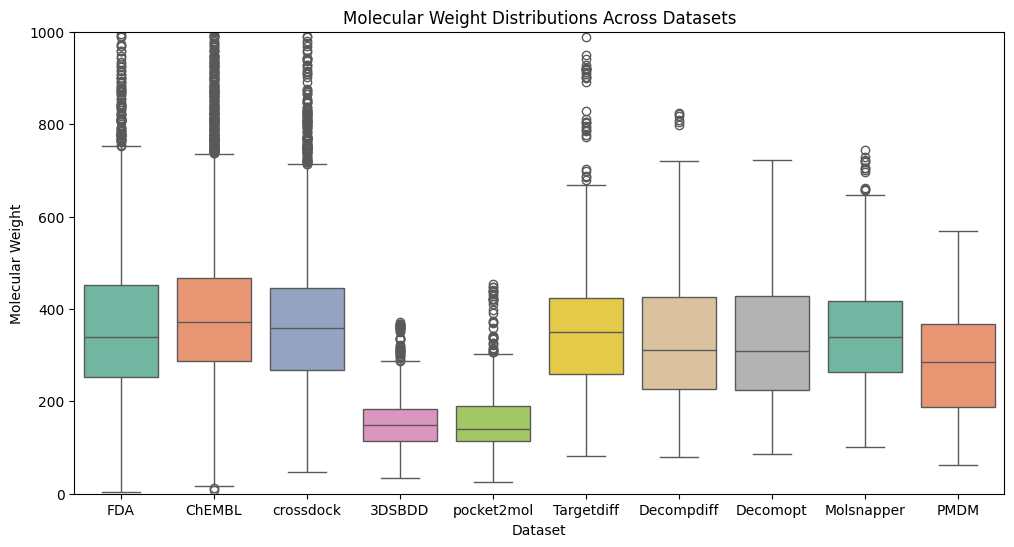

In [45]:
def calculate_molecular_weights(smiles_list):
    """Calculate molecular weights for a list of SMILES strings."""
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            mw = Descriptors.MolWt(mol)
            molecular_weights.append(mw)
    return molecular_weights

def plot_molecular_weight_boxplot(dfs, labels):
    """Plot the distribution of molecular weights for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        molecular_weights = calculate_molecular_weights(df['SMILES'].tolist())
        data.extend([(label, mw) for mw in molecular_weights])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Molecular Weight"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Molecular Weight", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Molecular Weight Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Molecular Weight")
    plt.ylim(0, 1000)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_molecular_weight_boxplot(dfs, labels)

Number of heavy atoms:

[16:16:19] WARNING: not removing hydrogen atom without neighbors
[16:16:20] WARNING: not removing hydrogen atom without neighbors
[16:16:20] WARNING: not removing hydrogen atom without neighbors
[16:16:20] WARNING: not removing hydrogen atom without neighbors
[16:16:20] WARNING: not removing hydrogen atom without neighbors


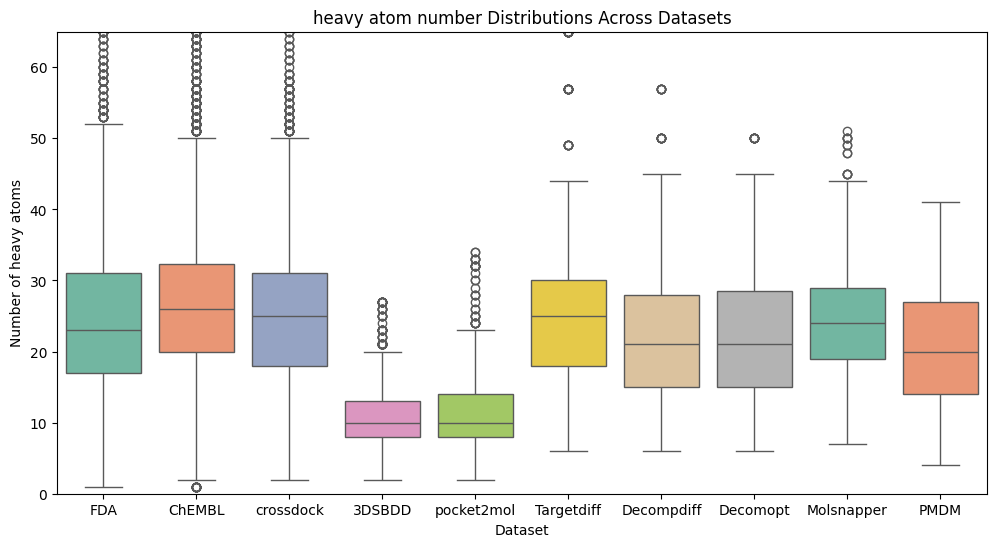

In [46]:
def calculate_heavy_atom_counts(smiles_list):
    """Calculate heavy atom counts for a list of SMILES strings."""
    heavy_atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            heavy_atom_count = mol.GetNumHeavyAtoms()
            heavy_atom_counts.append(heavy_atom_count)
    return heavy_atom_counts

def plot_HA_boxplot(dfs, labels):
    """Plot the distribution of molecular weights for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        molecular_weights = calculate_heavy_atom_counts(df['SMILES'].tolist())
        data.extend([(label, mw) for mw in molecular_weights])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "HA count"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="HA count", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("heavy atom number Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of heavy atoms")
    plt.ylim(0, 65)  # Set y-axis limit as per your requirement

    plt.show()
    
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_HA_boxplot(dfs, labels)

Number of hetero atoms:

[16:16:24] WARNING: not removing hydrogen atom without neighbors
[16:16:25] WARNING: not removing hydrogen atom without neighbors
[16:16:25] WARNING: not removing hydrogen atom without neighbors
[16:16:25] WARNING: not removing hydrogen atom without neighbors
[16:16:25] WARNING: not removing hydrogen atom without neighbors


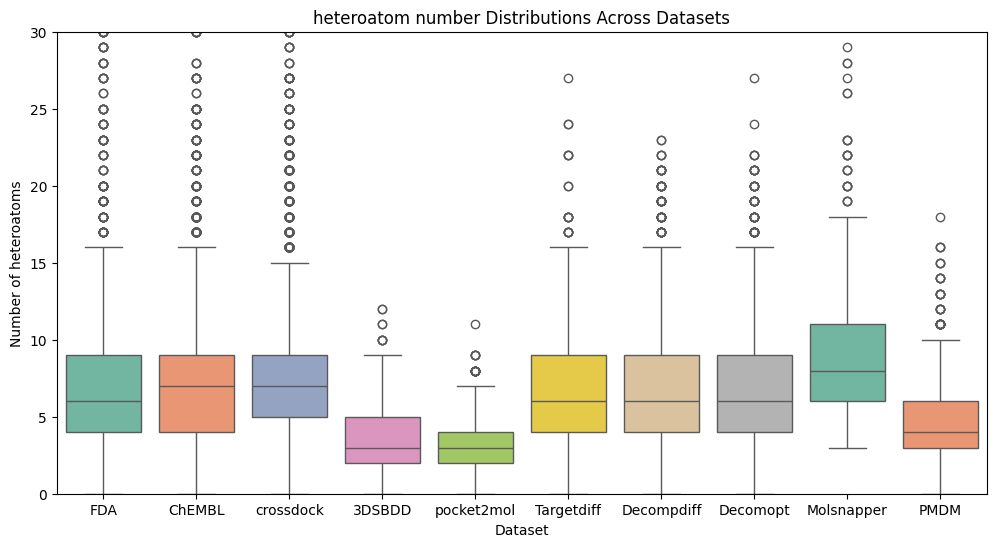

In [47]:
def calculate_heteroatom_counts(smiles_list):
    """Calculate the number of heteroatoms for each SMILES string in the list."""
    heteroatom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Count atoms that are not C or H
            heteroatom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() not in {1, 6})
            heteroatom_counts.append(heteroatom_count)
    return heteroatom_counts

def plot_HeteroA_boxplot(dfs, labels):
    """Plot the distribution of molecular weights for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        molecular_weights = calculate_heteroatom_counts(df['SMILES'].tolist())
        data.extend([(label, mw) for mw in molecular_weights])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "HeteroA count"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="HeteroA count", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("heteroatom number Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of heteroatoms")
    plt.ylim(0, 30)  # Set y-axis limit as per your requirement

    plt.show()

dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"] # Replace with your actual labels

plot_HeteroA_boxplot(dfs, labels)

Ratio of hetero atoms over heavy atoms:

[16:16:29] WARNING: not removing hydrogen atom without neighbors
[16:16:30] WARNING: not removing hydrogen atom without neighbors
[16:16:30] WARNING: not removing hydrogen atom without neighbors
[16:16:30] WARNING: not removing hydrogen atom without neighbors
[16:16:31] WARNING: not removing hydrogen atom without neighbors


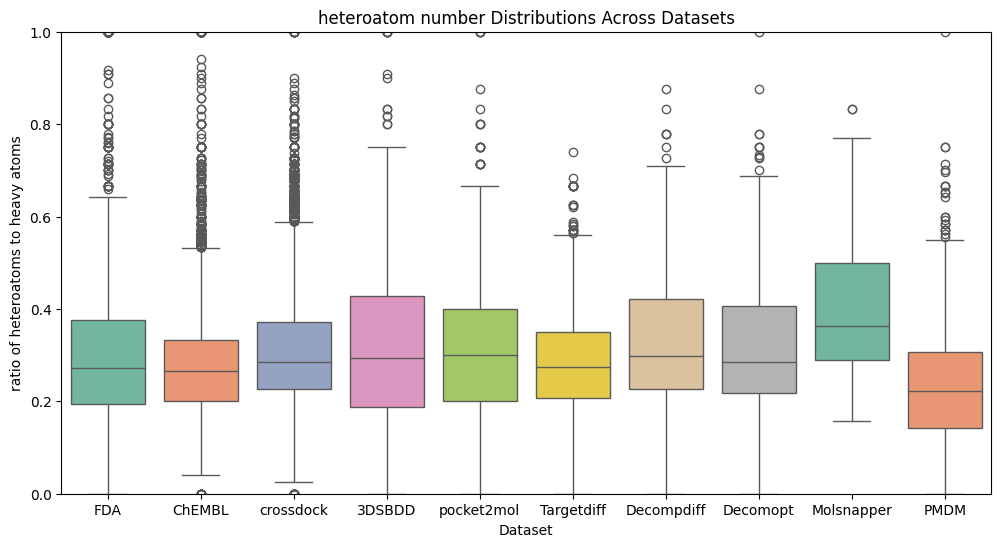

In [48]:
def calculate_heteroatom_ratio(smiles_list):
    """Calculate the ratio of heteroatoms to heavy atoms for each molecule in the SMILES list."""
    heteroatom_ratios = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Count heavy atoms (all atoms except hydrogen)
            heavy_atom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() != 1)
            # Count heteroatoms (atoms other than C and H)
            heteroatom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() not in {1, 6})
            # Calculate ratio if heavy_atom_count is non-zero
            if heavy_atom_count > 0:
                ratio = heteroatom_count / heavy_atom_count
                heteroatom_ratios.append(ratio)
    return heteroatom_ratios

def plot_HeteroA_HA_ratio(dfs, labels):
    """Plot the distribution of molecular weights for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        molecular_weights = calculate_heteroatom_ratio(df['SMILES'].tolist())
        data.extend([(label, mw) for mw in molecular_weights])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "ratio"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="ratio", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("heteroatom number Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("ratio of heteroatoms to heavy atoms")
    plt.ylim(0, 1)  # Set y-axis limit as per your requirement

    plt.show()

dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"] # Replace with your actual labels

plot_HeteroA_HA_ratio(dfs, labels)

Number of rotatable bonds

[16:16:58] WARNING: not removing hydrogen atom without neighbors
[16:16:58] WARNING: not removing hydrogen atom without neighbors
[16:16:58] WARNING: not removing hydrogen atom without neighbors
[16:16:58] WARNING: not removing hydrogen atom without neighbors
[16:16:59] WARNING: not removing hydrogen atom without neighbors


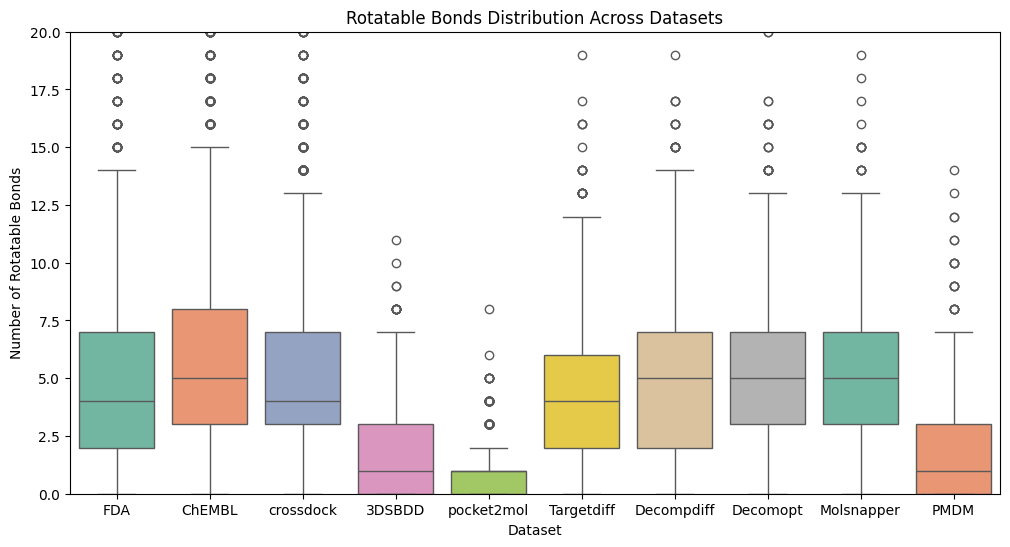

In [49]:
def calculate_rotatable_bonds(smiles_list):
    """Calculate the number of rotatable bonds for each molecule in the SMILES list."""
    rotatable_bonds_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of rotatable bonds
            rotatable_bonds = Descriptors.NumRotatableBonds(mol)
            rotatable_bonds_counts.append(rotatable_bonds)
    return rotatable_bonds_counts

def plot_rotatable_bonds_distribution(dfs, labels):
    """Plot the distribution of rotatable bonds for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        rotatable_bonds = calculate_rotatable_bonds(df['SMILES'].tolist())
        data.extend([(label, rb) for rb in rotatable_bonds])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Rotatable Bonds"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Rotatable Bonds", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Rotatable Bonds Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Rotatable Bonds")
    plt.ylim(0, 20)

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_rotatable_bonds_distribution(dfs, labels)

Number of HBD

[16:17:04] WARNING: not removing hydrogen atom without neighbors
[16:17:04] WARNING: not removing hydrogen atom without neighbors
[16:17:04] WARNING: not removing hydrogen atom without neighbors
[16:17:04] WARNING: not removing hydrogen atom without neighbors
[16:17:05] WARNING: not removing hydrogen atom without neighbors


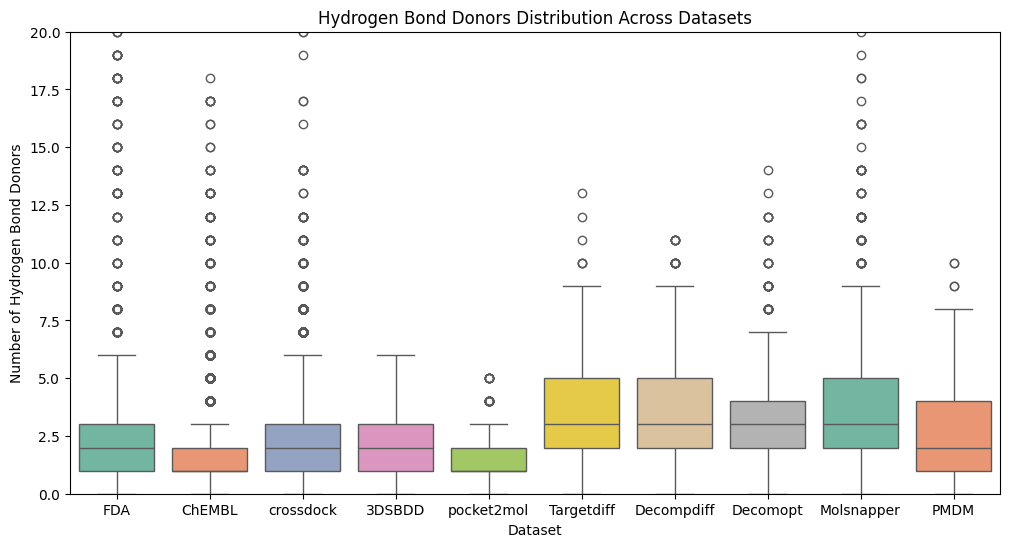

In [50]:
def calculate_hbond_donors(smiles_list):
    """Calculate the number of hydrogen bond donors for each molecule in the SMILES list."""
    hbond_donor_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of hydrogen bond donors
            hbond_donors = Descriptors.NumHDonors(mol)
            hbond_donor_counts.append(hbond_donors)
    return hbond_donor_counts

def plot_hbond_donors_distribution(dfs, labels):
    """Plot the distribution of hydrogen bond donors for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        hbond_donors = calculate_hbond_donors(df['SMILES'].tolist())
        data.extend([(label, hbd) for hbd in hbond_donors])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Hydrogen Bond Donors"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Hydrogen Bond Donors", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Hydrogen Bond Donors Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylim(0,20)
    plt.ylabel("Number of Hydrogen Bond Donors")

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_hbond_donors_distribution(dfs, labels)

Number of HBA

[16:17:08] WARNING: not removing hydrogen atom without neighbors
[16:17:09] WARNING: not removing hydrogen atom without neighbors
[16:17:09] WARNING: not removing hydrogen atom without neighbors
[16:17:09] WARNING: not removing hydrogen atom without neighbors
[16:17:09] WARNING: not removing hydrogen atom without neighbors


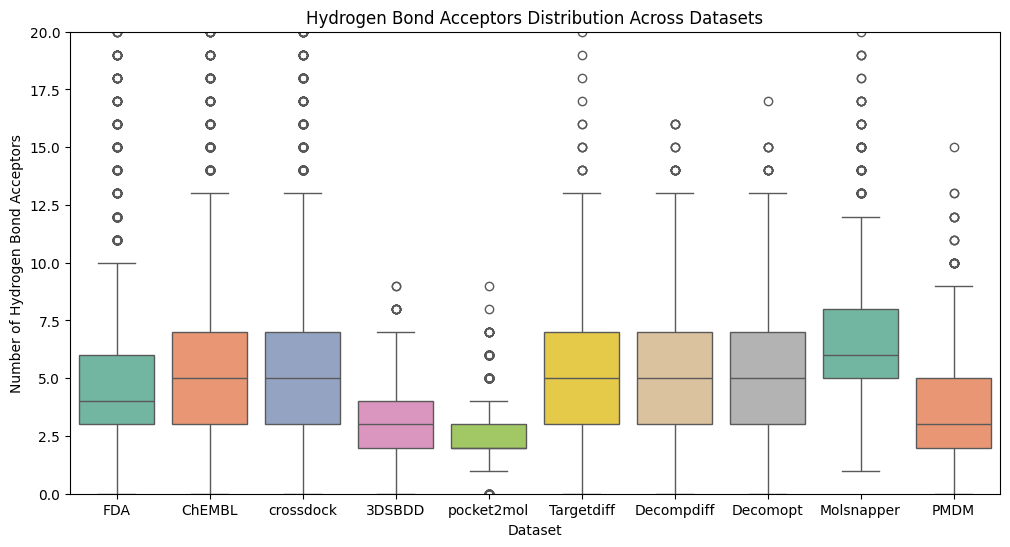

In [51]:
def calculate_hbond_acceptors(smiles_list):
    """Calculate the number of hydrogen bond acceptors for each molecule in the SMILES list."""
    hbond_acceptor_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of hydrogen bond acceptors
            hbond_acceptors = Descriptors.NumHAcceptors(mol)
            hbond_acceptor_counts.append(hbond_acceptors)
    return hbond_acceptor_counts

def plot_hbond_acceptors_distribution(dfs, labels):
    """Plot the distribution of hydrogen bond acceptors for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        hbond_acceptors = calculate_hbond_acceptors(df['SMILES'].tolist())
        data.extend([(label, hba) for hba in hbond_acceptors])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Hydrogen Bond Acceptors"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Hydrogen Bond Acceptors", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Hydrogen Bond Acceptors Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Hydrogen Bond Acceptors")
    plt.ylim(0, 20)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"] # Replace with your actual labels

plot_hbond_acceptors_distribution(dfs, labels)

TPSA

[16:19:21] WARNING: not removing hydrogen atom without neighbors
[16:19:22] WARNING: not removing hydrogen atom without neighbors
[16:19:22] WARNING: not removing hydrogen atom without neighbors
[16:19:22] WARNING: not removing hydrogen atom without neighbors
[16:19:22] WARNING: not removing hydrogen atom without neighbors


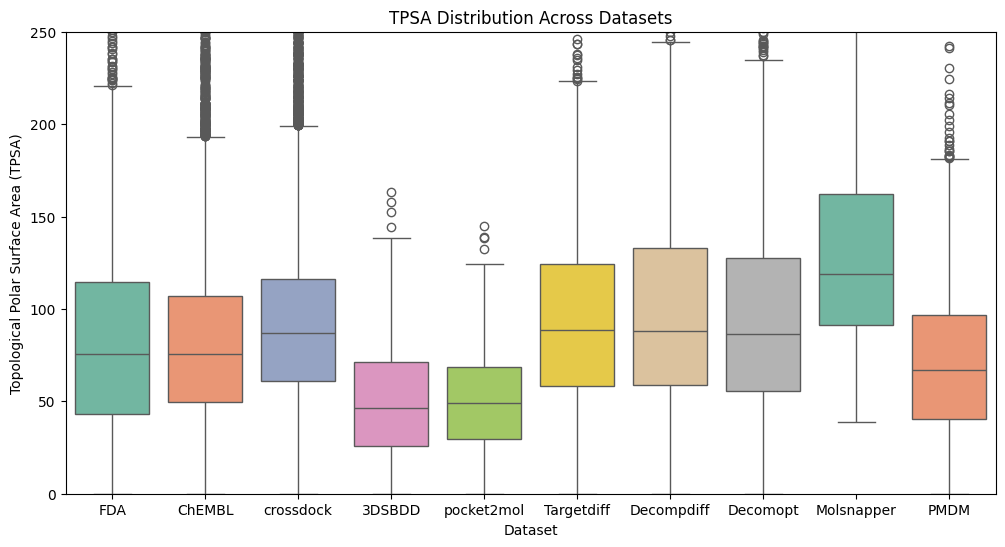

In [52]:
def calculate_tpsa(smiles_list):
    """Calculate the TPSA for each molecule in the SMILES list."""
    tpsa_values = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate TPSA
            tpsa = Descriptors.TPSA(mol)
            tpsa_values.append(tpsa)
    return tpsa_values

def plot_tpsa_distribution(dfs, labels):
    """Plot the distribution of TPSA for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        tpsa_values = calculate_tpsa(df['SMILES'].tolist())
        data.extend([(label, tpsa) for tpsa in tpsa_values])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "TPSA"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="TPSA", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("TPSA Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Topological Polar Surface Area (TPSA)")
    plt.ylim(0, 250)  # Adjust the y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_tpsa_distribution(dfs, labels)

Number of aliphatic heterocycles

[16:21:54] WARNING: not removing hydrogen atom without neighbors
[16:21:54] WARNING: not removing hydrogen atom without neighbors
[16:21:54] WARNING: not removing hydrogen atom without neighbors
[16:21:54] WARNING: not removing hydrogen atom without neighbors
[16:21:55] WARNING: not removing hydrogen atom without neighbors


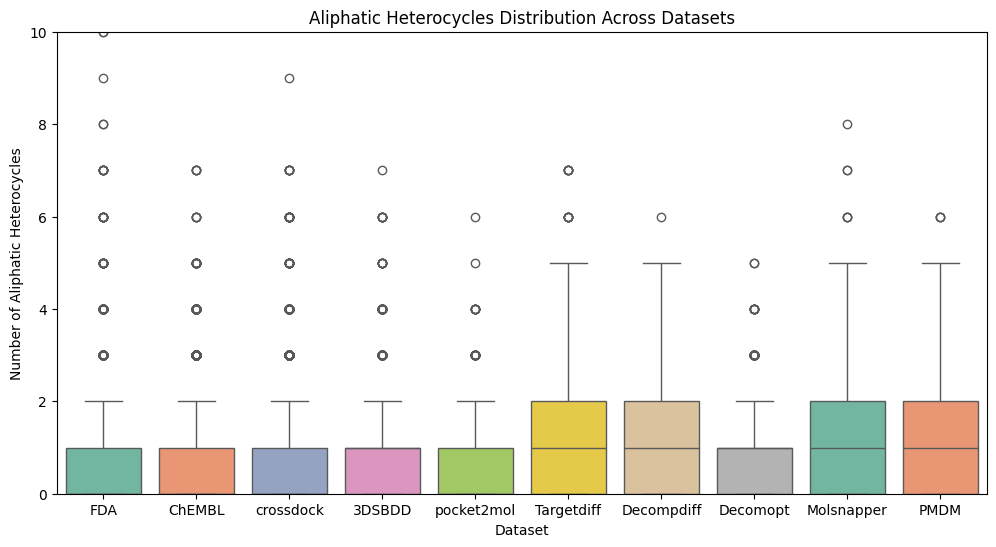

In [55]:
def calculate_aliphatic_heterocycles(smiles_list):
    """Calculate the number of aliphatic heterocycles for each molecule in the SMILES list."""
    aliphatic_heterocycle_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aliphatic heterocycles
            aliphatic_heterocycles = Lipinski.NumAliphaticHeterocycles(mol)
            aliphatic_heterocycle_counts.append(aliphatic_heterocycles)
    return aliphatic_heterocycle_counts

def plot_aliphatic_heterocycles_distribution(dfs, labels):
    """Plot the distribution of aliphatic heterocycles for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        aliphatic_heterocycles = calculate_aliphatic_heterocycles(df['SMILES'].tolist())
        data.extend([(label, count) for count in aliphatic_heterocycles])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aliphatic Heterocycles"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Aliphatic Heterocycles", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Aliphatic Heterocycles Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aliphatic Heterocycles")
    plt.ylim(0, 10)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aliphatic_heterocycles_distribution(dfs, labels)

Number of aromatic heterocyclies.

[16:24:46] WARNING: not removing hydrogen atom without neighbors
[16:24:47] WARNING: not removing hydrogen atom without neighbors
[16:24:47] WARNING: not removing hydrogen atom without neighbors
[16:24:47] WARNING: not removing hydrogen atom without neighbors
[16:24:47] WARNING: not removing hydrogen atom without neighbors


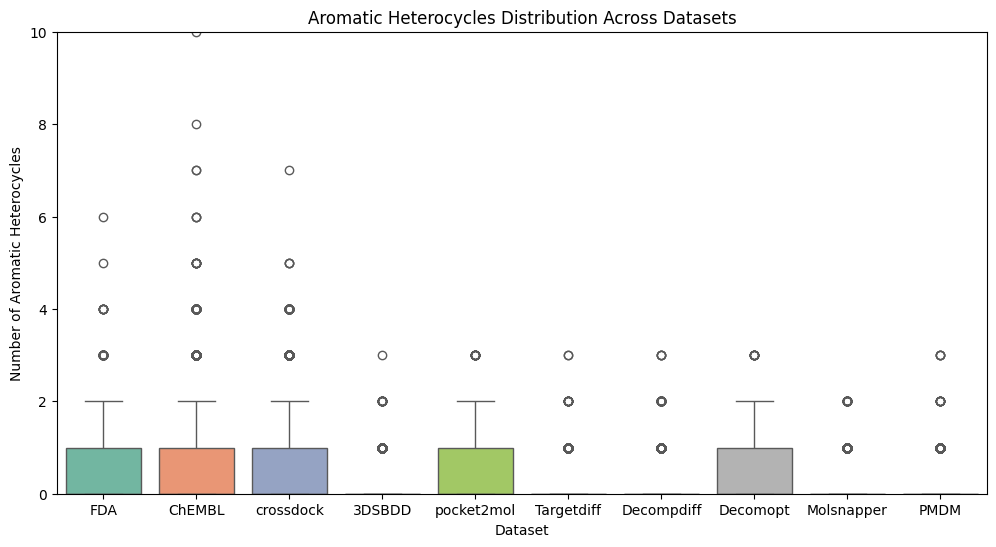

In [56]:
def calculate_aromatic_heterocycles(smiles_list):
    """Calculate the number of aromatic heterocycles for each molecule in the SMILES list."""
    aromatic_heterocycle_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aromatic heterocycles
            aromatic_heterocycles = Lipinski.NumAromaticHeterocycles(mol)
            aromatic_heterocycle_counts.append(aromatic_heterocycles)
    return aromatic_heterocycle_counts

def plot_aromatic_heterocycles_distribution(dfs, labels):
    """Plot the distribution of aromatic heterocycles for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        aromatic_heterocycles = calculate_aromatic_heterocycles(df['SMILES'].tolist())
        data.extend([(label, count) for count in aromatic_heterocycles])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aromatic Heterocycles"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Aromatic Heterocycles", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Aromatic Heterocycles Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aromatic Heterocycles")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aromatic_heterocycles_distribution(dfs, labels)

Number of aliphatic rings:

[16:27:08] WARNING: not removing hydrogen atom without neighbors
[16:27:09] WARNING: not removing hydrogen atom without neighbors
[16:27:09] WARNING: not removing hydrogen atom without neighbors
[16:27:09] WARNING: not removing hydrogen atom without neighbors
[16:27:09] WARNING: not removing hydrogen atom without neighbors


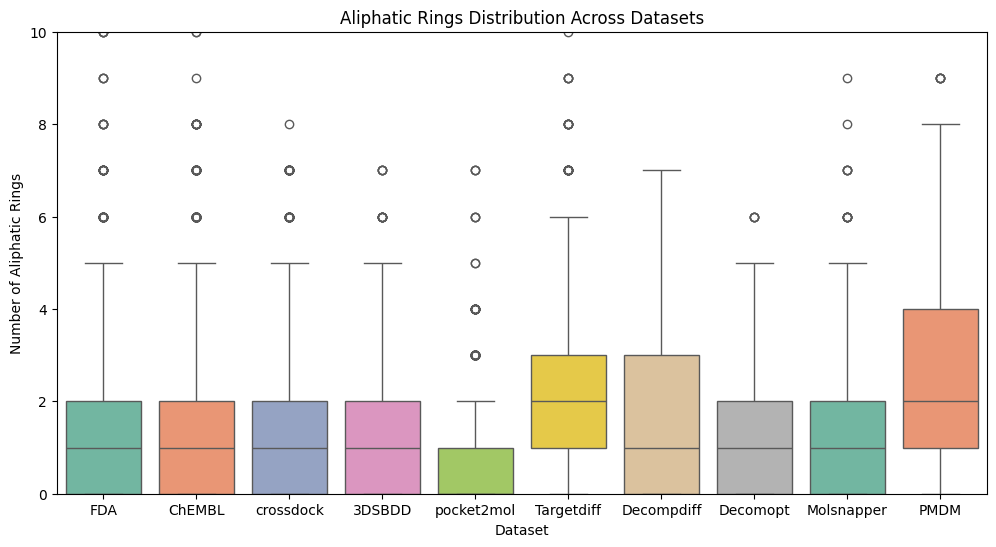

In [57]:
def calculate_aliphatic_rings(smiles_list):
    """Calculate the number of aliphatic rings for each molecule in the SMILES list."""
    aliphatic_ring_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aliphatic rings
            aliphatic_rings = Lipinski.NumAliphaticRings(mol)
            aliphatic_ring_counts.append(aliphatic_rings)
    return aliphatic_ring_counts

def plot_aliphatic_rings_distribution(dfs, labels):
    """Plot the distribution of aliphatic rings for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        aliphatic_rings = calculate_aliphatic_rings(df['SMILES'].tolist())
        data.extend([(label, count) for count in aliphatic_rings])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aliphatic Rings"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Aliphatic Rings", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Aliphatic Rings Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aliphatic Rings")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aliphatic_rings_distribution(dfs, labels)

Number of aromatic rings:

[16:31:00] WARNING: not removing hydrogen atom without neighbors
[16:31:00] WARNING: not removing hydrogen atom without neighbors
[16:31:00] WARNING: not removing hydrogen atom without neighbors
[16:31:00] WARNING: not removing hydrogen atom without neighbors
[16:31:01] WARNING: not removing hydrogen atom without neighbors


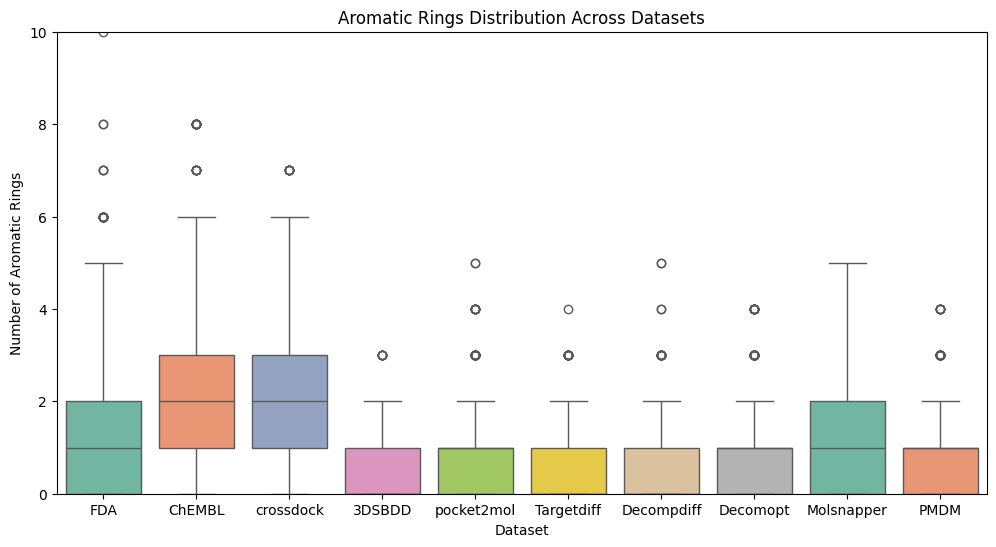

In [58]:
def calculate_aromatic_rings(smiles_list):
    """Calculate the number of aromatic rings for each molecule in the SMILES list."""
    aromatic_ring_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aromatic rings
            aromatic_rings = Lipinski.NumAromaticRings(mol)
            aromatic_ring_counts.append(aromatic_rings)
    return aromatic_ring_counts

def plot_aromatic_rings_distribution(dfs, labels):
    """Plot the distribution of aromatic rings for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        aromatic_rings = calculate_aromatic_rings(df['SMILES'].tolist())
        data.extend([(label, count) for count in aromatic_rings])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aromatic Rings"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="Aromatic Rings", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Aromatic Rings Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aromatic Rings")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aromatic_rings_distribution(dfs, labels)

NUmber of NHs and OHs:

[16:36:22] WARNING: not removing hydrogen atom without neighbors
[16:36:22] WARNING: not removing hydrogen atom without neighbors
[16:36:22] WARNING: not removing hydrogen atom without neighbors
[16:36:22] WARNING: not removing hydrogen atom without neighbors
[16:36:22] WARNING: not removing hydrogen atom without neighbors


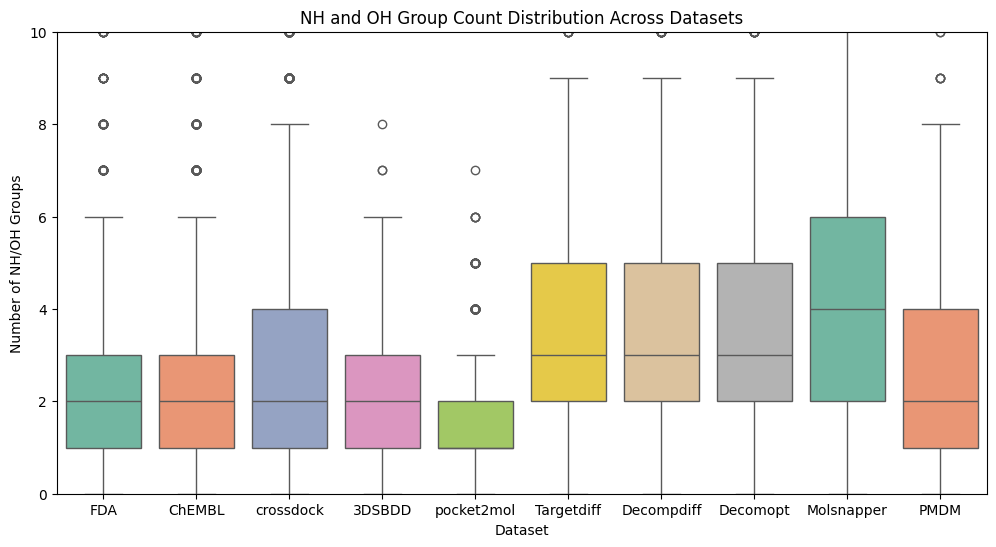

In [60]:
def calculate_nhoh_counts(smiles_list):
    """Calculate the number of NH and OH groups for each molecule in the SMILES list."""
    nhoh_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of NH and OH groups
            nhoh_count = Lipinski.NHOHCount(mol)
            nhoh_counts.append(nhoh_count)
    return nhoh_counts

def plot_nhoh_distribution(dfs, labels):
    """Plot the distribution of NH and OH counts for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        nhoh_counts = calculate_nhoh_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in nhoh_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "NH/OH Count"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="NH/OH Count", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("NH and OH Group Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of NH/OH Groups")
    plt.ylim(0, 10)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_nhoh_distribution(dfs, labels)

Number of NO:

[16:38:29] WARNING: not removing hydrogen atom without neighbors
[16:38:29] WARNING: not removing hydrogen atom without neighbors
[16:38:29] WARNING: not removing hydrogen atom without neighbors
[16:38:29] WARNING: not removing hydrogen atom without neighbors
[16:38:30] WARNING: not removing hydrogen atom without neighbors


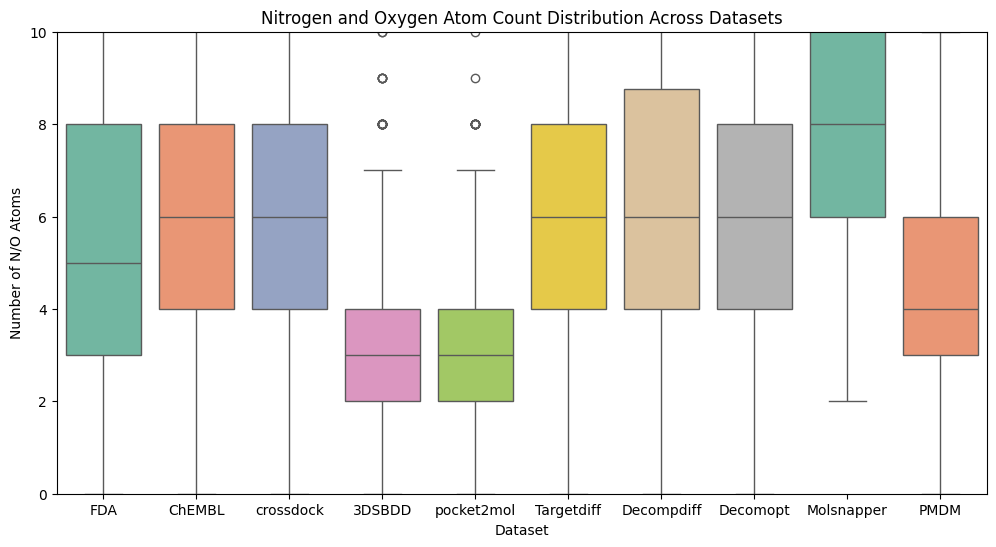

In [61]:
def calculate_no_counts(smiles_list):
    """Calculate the number of nitrogen (N) and oxygen (O) atoms for each molecule in the SMILES list."""
    no_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of N and O atoms
            no_count = Lipinski.NOCount(mol)
            no_counts.append(no_count)
    return no_counts

def plot_no_distribution(dfs, labels):
    """Plot the distribution of N and O counts for multiple DataFrames as a box plot."""
    # Prepare data for boxplot
    data = []
    for df, label in zip(dfs, labels):
        no_counts = calculate_no_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in no_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "N/O Count"])
    
    # Plotting the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Dataset", y="N/O Count", data=plot_df, palette="Set2")
    
    # Customizing the plot
    plt.title("Nitrogen and Oxygen Atom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of N/O Atoms")
    plt.ylim(0, 10)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_no_distribution(dfs, labels)

### violin plot

[16:48:00] WARNING: not removing hydrogen atom without neighbors
[16:48:00] WARNING: not removing hydrogen atom without neighbors
[16:48:00] WARNING: not removing hydrogen atom without neighbors
[16:48:00] WARNING: not removing hydrogen atom without neighbors
[16:48:00] WARNING: not removing hydrogen atom without neighbors


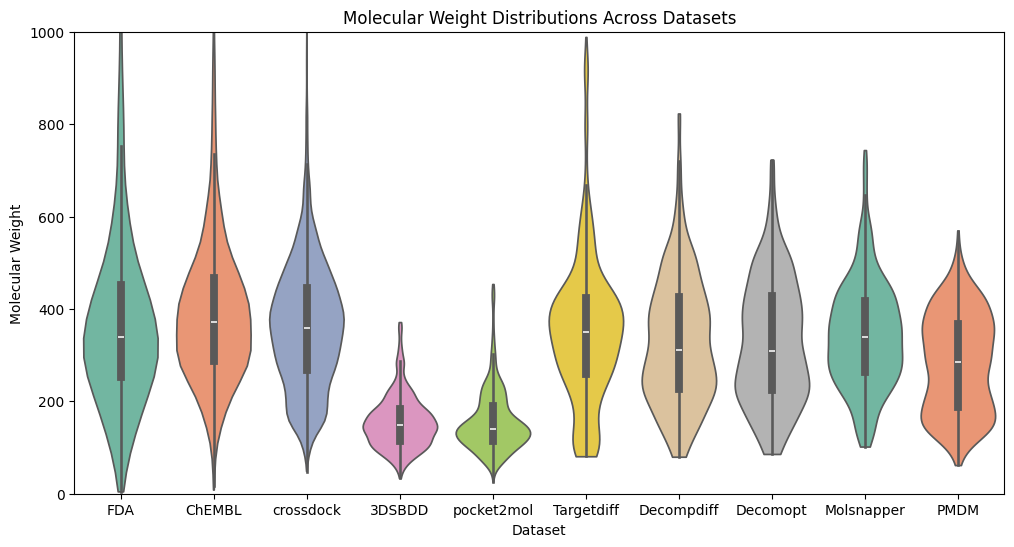

In [63]:
def calculate_molecular_weights(smiles_list):
    """Calculate molecular weights for a list of SMILES strings."""
    molecular_weights = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            mw = Descriptors.MolWt(mol)
            molecular_weights.append(mw)
    return molecular_weights

def plot_molecular_weight_violinplot(dfs, labels):
    """Plot the distribution of molecular weights for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        molecular_weights = calculate_molecular_weights(df['SMILES'].tolist())
        data.extend([(label, mw) for mw in molecular_weights])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Molecular Weight"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Molecular Weight", data=plot_df, palette="Set2", cut=0)

    # Customizing the plot
    plt.title("Molecular Weight Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Molecular Weight")
    plt.ylim(0, 1000)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_molecular_weight_violinplot(dfs, labels)

[16:49:24] WARNING: not removing hydrogen atom without neighbors
[16:49:24] WARNING: not removing hydrogen atom without neighbors
[16:49:24] WARNING: not removing hydrogen atom without neighbors
[16:49:24] WARNING: not removing hydrogen atom without neighbors
[16:49:24] WARNING: not removing hydrogen atom without neighbors


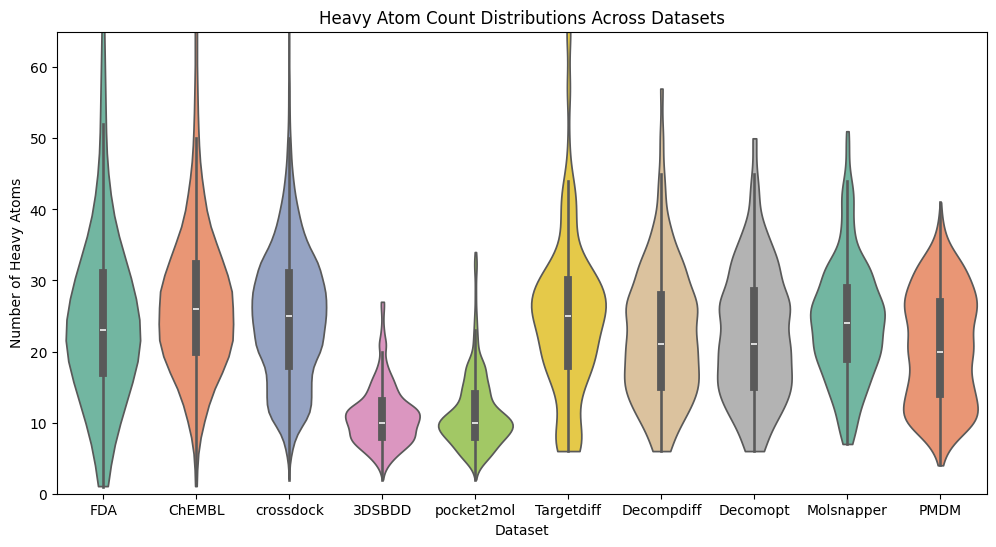

In [64]:
def calculate_heavy_atom_counts(smiles_list):
    """Calculate heavy atom counts for a list of SMILES strings."""
    heavy_atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            heavy_atom_count = mol.GetNumHeavyAtoms()
            heavy_atom_counts.append(heavy_atom_count)
    return heavy_atom_counts

def plot_HA_violinplot(dfs, labels):
    """Plot the distribution of heavy atom counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        heavy_atom_counts = calculate_heavy_atom_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in heavy_atom_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Heavy Atom Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Heavy Atom Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Heavy Atom Count Distributions Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Heavy Atoms")
    plt.ylim(0, 65)  # Set y-axis limit as per your requirement

    plt.show()
    
# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_HA_violinplot(dfs, labels)

[17:06:00] WARNING: not removing hydrogen atom without neighbors
[17:06:01] WARNING: not removing hydrogen atom without neighbors
[17:06:01] WARNING: not removing hydrogen atom without neighbors
[17:06:01] WARNING: not removing hydrogen atom without neighbors
[17:06:01] WARNING: not removing hydrogen atom without neighbors


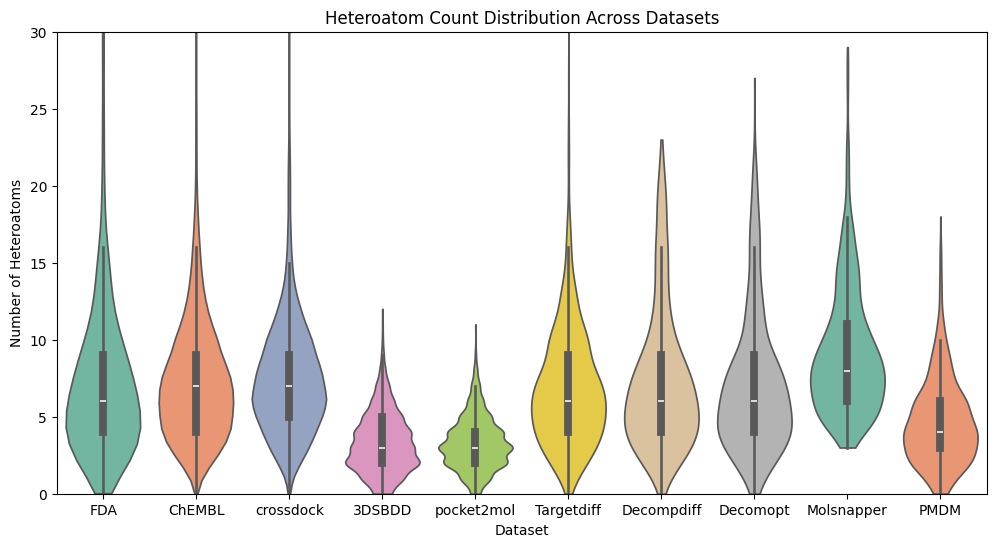

In [76]:
def calculate_heteroatom_counts(smiles_list):
    """Calculate the number of heteroatoms for each SMILES string in the list."""
    heteroatom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Count atoms that are not C or H
            heteroatom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() not in {1, 6})
            heteroatom_counts.append(heteroatom_count)
    return heteroatom_counts

def plot_HeteroA_violinplot(dfs, labels):
    """Plot the distribution of heteroatom counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        heteroatom_counts = calculate_heteroatom_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in heteroatom_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Heteroatom Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Heteroatom Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Heteroatom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Heteroatoms")
    plt.ylim(0, 30)  # Set y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_HeteroA_violinplot(dfs, labels)

[16:50:28] WARNING: not removing hydrogen atom without neighbors
[16:50:28] WARNING: not removing hydrogen atom without neighbors
[16:50:28] WARNING: not removing hydrogen atom without neighbors
[16:50:28] WARNING: not removing hydrogen atom without neighbors
[16:50:29] WARNING: not removing hydrogen atom without neighbors


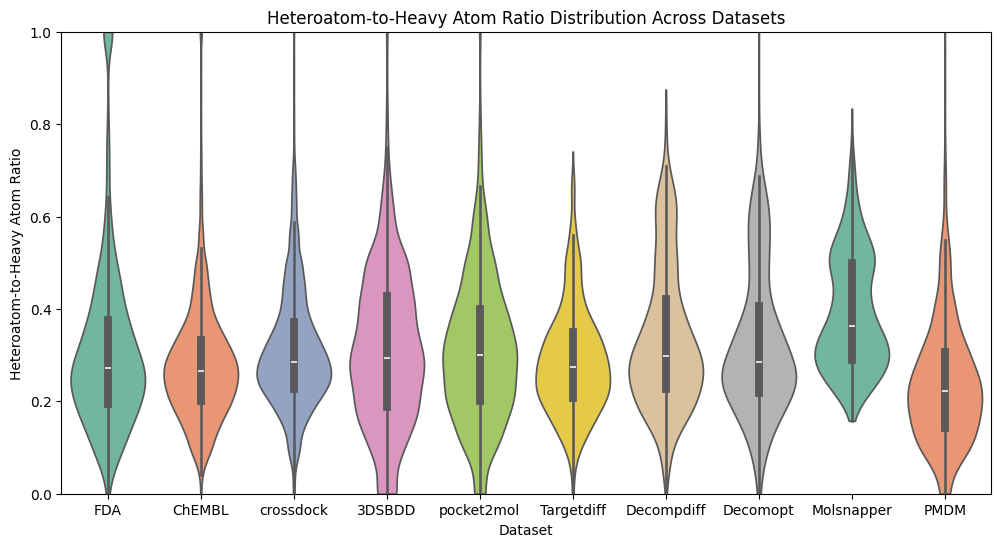

In [65]:
def calculate_heteroatom_ratio(smiles_list):
    """Calculate the ratio of heteroatoms to heavy atoms for each molecule in the SMILES list."""
    heteroatom_ratios = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Count heavy atoms (all atoms except hydrogen)
            heavy_atom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() != 1)
            # Count heteroatoms (atoms other than C and H)
            heteroatom_count = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() not in {1, 6})
            # Calculate ratio if heavy_atom_count is non-zero
            if heavy_atom_count > 0:
                ratio = heteroatom_count / heavy_atom_count
                heteroatom_ratios.append(ratio)
    return heteroatom_ratios

def plot_HeteroA_HA_violinplot(dfs, labels):
    """Plot the distribution of heteroatom-to-heavy atom ratios for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        ratios = calculate_heteroatom_ratio(df['SMILES'].tolist())
        data.extend([(label, ratio) for ratio in ratios])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Heteroatom/Heavy Atom Ratio"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Heteroatom/Heavy Atom Ratio", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Heteroatom-to-Heavy Atom Ratio Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Heteroatom-to-Heavy Atom Ratio")
    plt.ylim(0, 1)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"] # Replace with your actual labels

plot_HeteroA_HA_violinplot(dfs, labels)

[16:51:46] WARNING: not removing hydrogen atom without neighbors
[16:51:47] WARNING: not removing hydrogen atom without neighbors
[16:51:47] WARNING: not removing hydrogen atom without neighbors
[16:51:47] WARNING: not removing hydrogen atom without neighbors
[16:51:48] WARNING: not removing hydrogen atom without neighbors


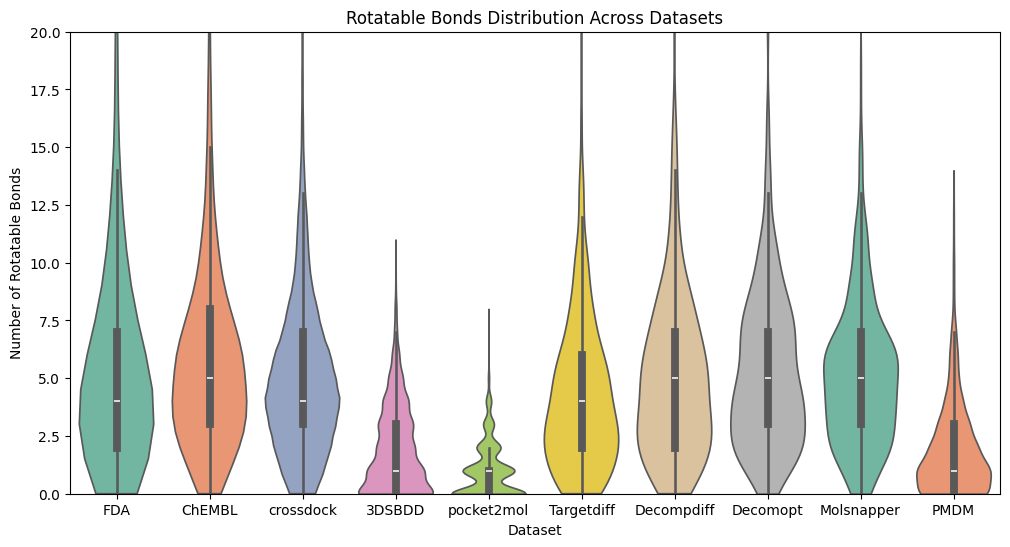

In [66]:
def calculate_rotatable_bonds(smiles_list):
    """Calculate the number of rotatable bonds for each molecule in the SMILES list."""
    rotatable_bonds_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of rotatable bonds
            rotatable_bonds = Descriptors.NumRotatableBonds(mol)
            rotatable_bonds_counts.append(rotatable_bonds)
    return rotatable_bonds_counts

def plot_rotatable_bonds_violinplot(dfs, labels):
    """Plot the distribution of rotatable bonds for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        rotatable_bonds = calculate_rotatable_bonds(df['SMILES'].tolist())
        data.extend([(label, rb) for rb in rotatable_bonds])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Rotatable Bonds"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Rotatable Bonds", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Rotatable Bonds Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Rotatable Bonds")
    plt.ylim(0, 20)

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_rotatable_bonds_violinplot(dfs, labels)

[16:52:59] WARNING: not removing hydrogen atom without neighbors
[16:52:59] WARNING: not removing hydrogen atom without neighbors
[16:52:59] WARNING: not removing hydrogen atom without neighbors
[16:52:59] WARNING: not removing hydrogen atom without neighbors
[16:53:00] WARNING: not removing hydrogen atom without neighbors


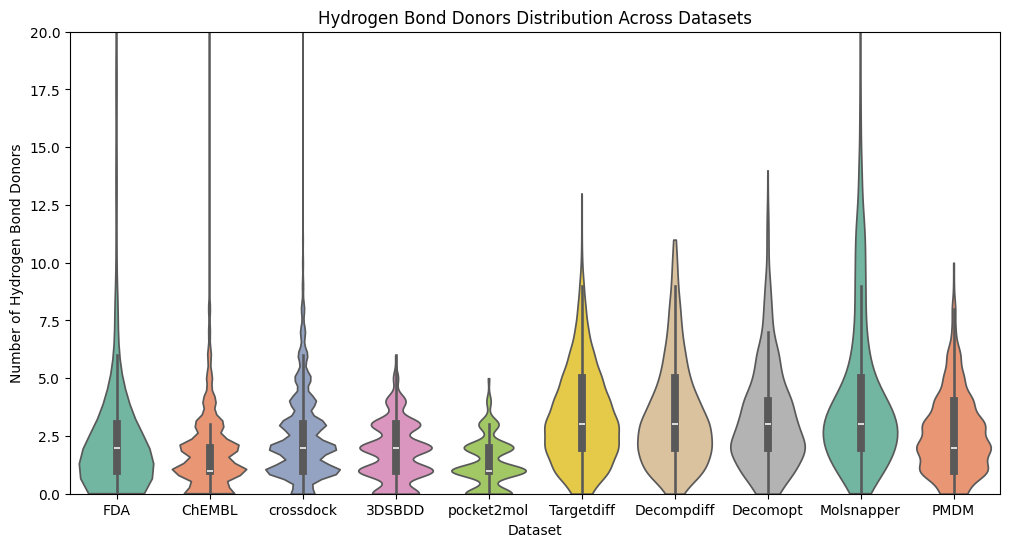

In [67]:
def calculate_hbond_donors(smiles_list):
    """Calculate the number of hydrogen bond donors for each molecule in the SMILES list."""
    hbond_donor_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of hydrogen bond donors
            hbond_donors = Descriptors.NumHDonors(mol)
            hbond_donor_counts.append(hbond_donors)
    return hbond_donor_counts

def plot_hbond_donors_violinplot(dfs, labels):
    """Plot the distribution of hydrogen bond donors for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        hbond_donors = calculate_hbond_donors(df['SMILES'].tolist())
        data.extend([(label, hbd) for hbd in hbond_donors])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Hydrogen Bond Donors"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Hydrogen Bond Donors", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Hydrogen Bond Donors Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Hydrogen Bond Donors")
    plt.ylim(0, 20)  # Set y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_hbond_donors_violinplot(dfs, labels)

[16:54:27] WARNING: not removing hydrogen atom without neighbors
[16:54:28] WARNING: not removing hydrogen atom without neighbors
[16:54:28] WARNING: not removing hydrogen atom without neighbors
[16:54:28] WARNING: not removing hydrogen atom without neighbors
[16:54:28] WARNING: not removing hydrogen atom without neighbors


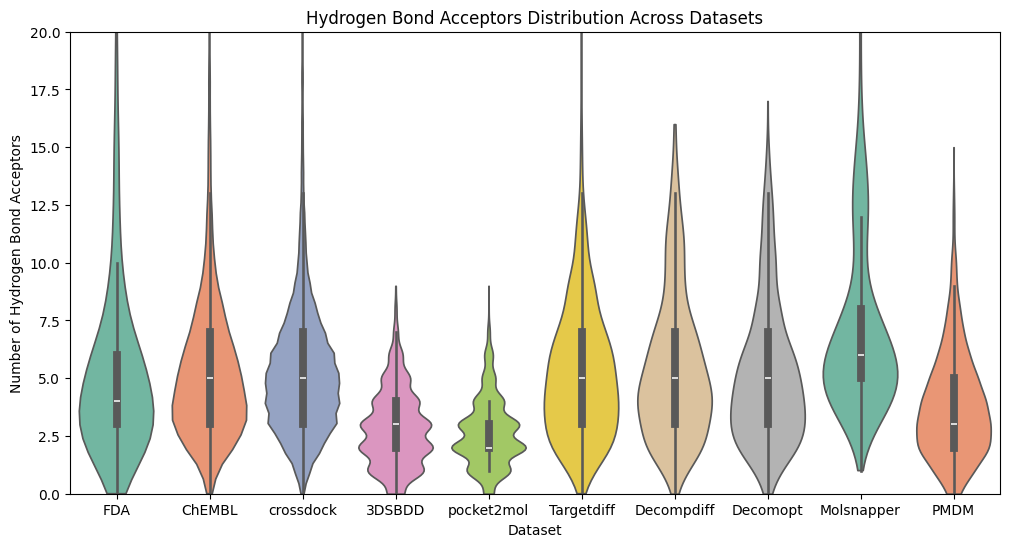

In [68]:
def calculate_hbond_acceptors(smiles_list):
    """Calculate the number of hydrogen bond acceptors for each molecule in the SMILES list."""
    hbond_acceptor_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of hydrogen bond acceptors
            hbond_acceptors = Descriptors.NumHAcceptors(mol)
            hbond_acceptor_counts.append(hbond_acceptors)
    return hbond_acceptor_counts

def plot_hbond_acceptors_violinplot(dfs, labels):
    """Plot the distribution of hydrogen bond acceptors for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        hbond_acceptors = calculate_hbond_acceptors(df['SMILES'].tolist())
        data.extend([(label, hba) for hba in hbond_acceptors])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Hydrogen Bond Acceptors"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Hydrogen Bond Acceptors", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Hydrogen Bond Acceptors Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Hydrogen Bond Acceptors")
    plt.ylim(0, 20)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_hbond_acceptors_violinplot(dfs, labels)

[16:55:28] WARNING: not removing hydrogen atom without neighbors
[16:55:28] WARNING: not removing hydrogen atom without neighbors
[16:55:28] WARNING: not removing hydrogen atom without neighbors
[16:55:28] WARNING: not removing hydrogen atom without neighbors
[16:55:28] WARNING: not removing hydrogen atom without neighbors


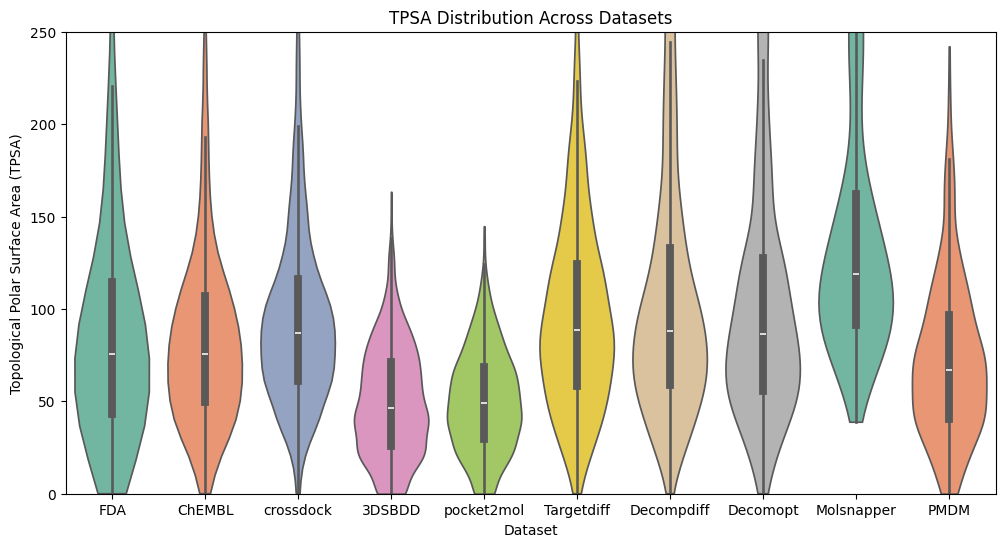

In [69]:
def calculate_tpsa(smiles_list):
    """Calculate the TPSA for each molecule in the SMILES list."""
    tpsa_values = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate TPSA
            tpsa = Descriptors.TPSA(mol)
            tpsa_values.append(tpsa)
    return tpsa_values

def plot_tpsa_violinplot(dfs, labels):
    """Plot the distribution of TPSA for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        tpsa_values = calculate_tpsa(df['SMILES'].tolist())
        data.extend([(label, tpsa) for tpsa in tpsa_values])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "TPSA"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="TPSA", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("TPSA Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Topological Polar Surface Area (TPSA)")
    plt.ylim(0, 250)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_tpsa_violinplot(dfs, labels)

[16:56:25] WARNING: not removing hydrogen atom without neighbors
[16:56:26] WARNING: not removing hydrogen atom without neighbors
[16:56:26] WARNING: not removing hydrogen atom without neighbors
[16:56:26] WARNING: not removing hydrogen atom without neighbors
[16:56:26] WARNING: not removing hydrogen atom without neighbors


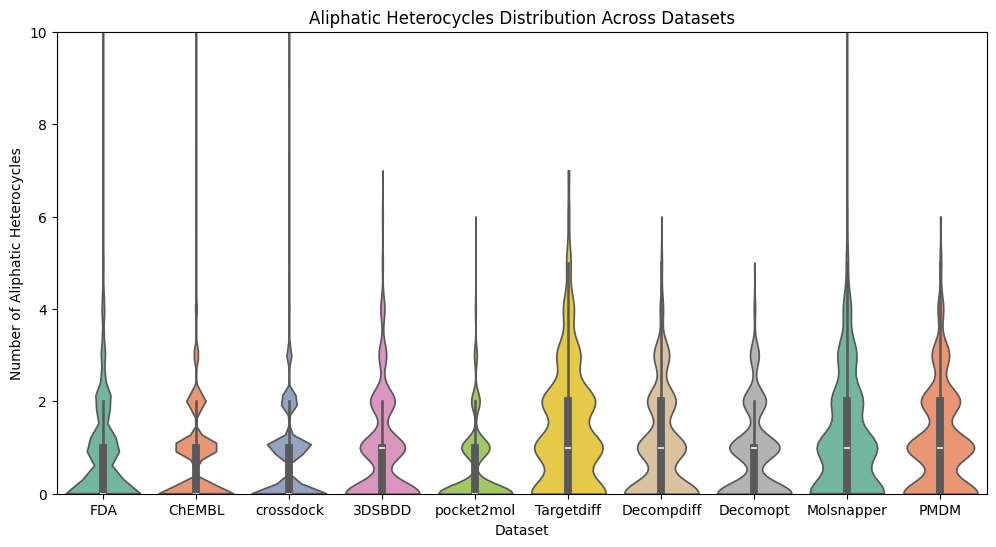

In [70]:
def calculate_aliphatic_heterocycles(smiles_list):
    """Calculate the number of aliphatic heterocycles for each molecule in the SMILES list."""
    aliphatic_heterocycle_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aliphatic heterocycles
            aliphatic_heterocycles = Lipinski.NumAliphaticHeterocycles(mol)
            aliphatic_heterocycle_counts.append(aliphatic_heterocycles)
    return aliphatic_heterocycle_counts

def plot_aliphatic_heterocycles_violinplot(dfs, labels):
    """Plot the distribution of aliphatic heterocycles for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        aliphatic_heterocycles = calculate_aliphatic_heterocycles(df['SMILES'].tolist())
        data.extend([(label, count) for count in aliphatic_heterocycles])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aliphatic Heterocycles"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Aliphatic Heterocycles", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Aliphatic Heterocycles Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aliphatic Heterocycles")
    plt.ylim(0, 10)  # Set y-axis limit as per your requirement

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aliphatic_heterocycles_violinplot(dfs, labels)

[16:57:39] WARNING: not removing hydrogen atom without neighbors
[16:57:39] WARNING: not removing hydrogen atom without neighbors
[16:57:39] WARNING: not removing hydrogen atom without neighbors
[16:57:39] WARNING: not removing hydrogen atom without neighbors
[16:57:40] WARNING: not removing hydrogen atom without neighbors


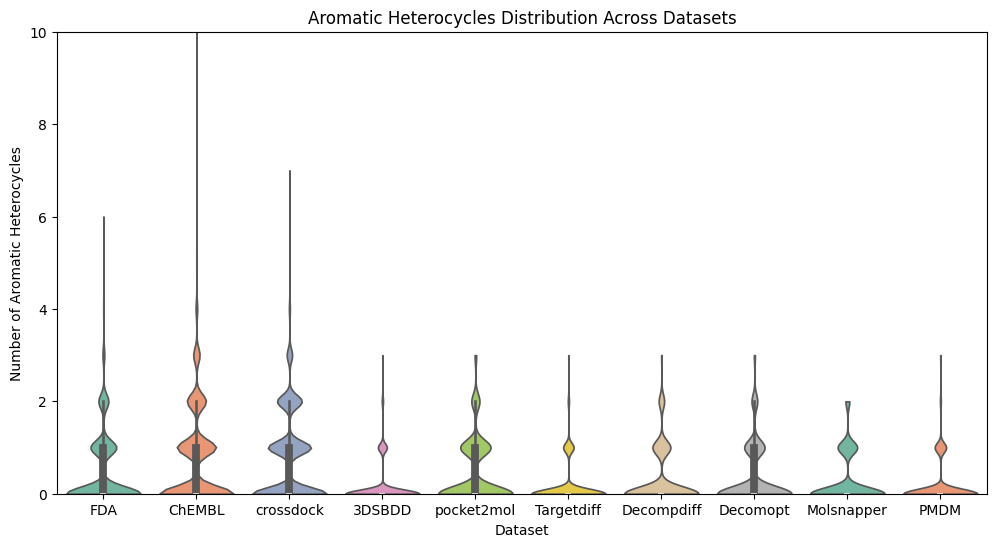

In [71]:
def calculate_aromatic_heterocycles(smiles_list):
    """Calculate the number of aromatic heterocycles for each molecule in the SMILES list."""
    aromatic_heterocycle_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aromatic heterocycles
            aromatic_heterocycles = Lipinski.NumAromaticHeterocycles(mol)
            aromatic_heterocycle_counts.append(aromatic_heterocycles)
    return aromatic_heterocycle_counts

def plot_aromatic_heterocycles_violinplot(dfs, labels):
    """Plot the distribution of aromatic heterocycles for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        aromatic_heterocycles = calculate_aromatic_heterocycles(df['SMILES'].tolist())
        data.extend([(label, count) for count in aromatic_heterocycles])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aromatic Heterocycles"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Aromatic Heterocycles", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Aromatic Heterocycles Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aromatic Heterocycles")
    plt.ylim(0, 10)  # Set y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aromatic_heterocycles_violinplot(dfs, labels)

[16:58:49] WARNING: not removing hydrogen atom without neighbors
[16:58:49] WARNING: not removing hydrogen atom without neighbors
[16:58:49] WARNING: not removing hydrogen atom without neighbors
[16:58:49] WARNING: not removing hydrogen atom without neighbors
[16:58:50] WARNING: not removing hydrogen atom without neighbors


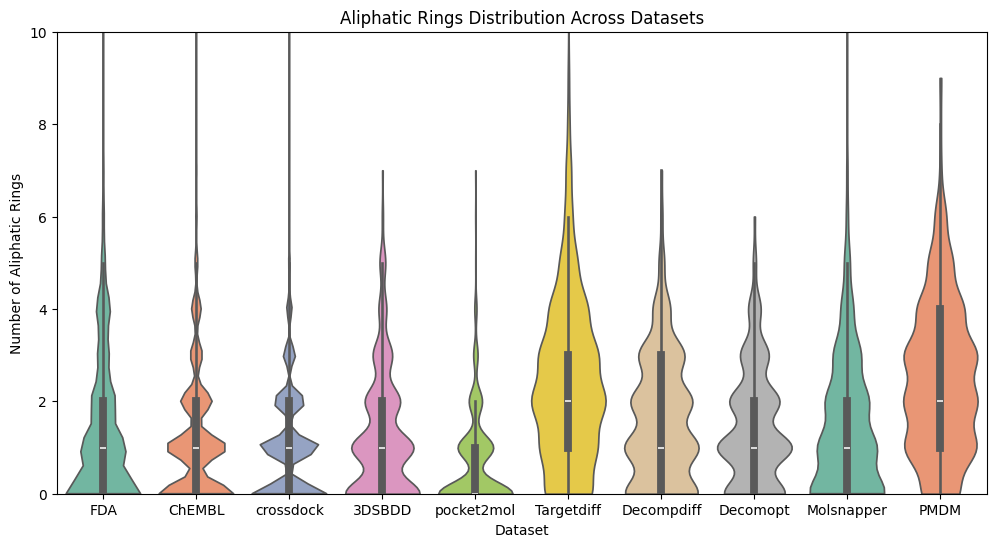

In [72]:
def calculate_aliphatic_rings(smiles_list):
    """Calculate the number of aliphatic rings for each molecule in the SMILES list."""
    aliphatic_ring_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aliphatic rings
            aliphatic_rings = Lipinski.NumAliphaticRings(mol)
            aliphatic_ring_counts.append(aliphatic_rings)
    return aliphatic_ring_counts

def plot_aliphatic_rings_violinplot(dfs, labels):
    """Plot the distribution of aliphatic rings for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        aliphatic_rings = calculate_aliphatic_rings(df['SMILES'].tolist())
        data.extend([(label, count) for count in aliphatic_rings])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aliphatic Rings"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Aliphatic Rings", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Aliphatic Rings Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aliphatic Rings")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aliphatic_rings_violinplot(dfs, labels)

[16:59:49] WARNING: not removing hydrogen atom without neighbors
[16:59:49] WARNING: not removing hydrogen atom without neighbors
[16:59:49] WARNING: not removing hydrogen atom without neighbors
[16:59:49] WARNING: not removing hydrogen atom without neighbors
[16:59:50] WARNING: not removing hydrogen atom without neighbors


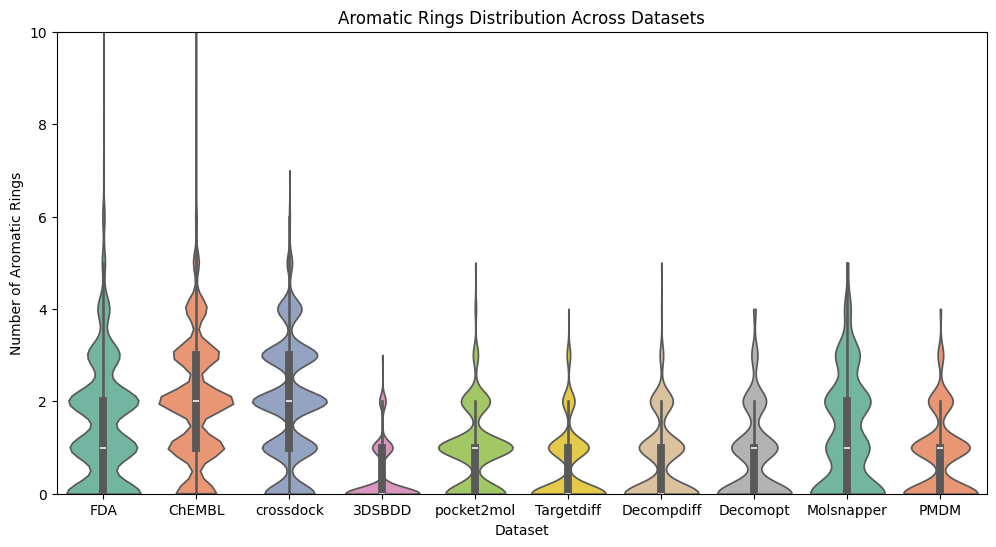

In [73]:
def calculate_aromatic_rings(smiles_list):
    """Calculate the number of aromatic rings for each molecule in the SMILES list."""
    aromatic_ring_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of aromatic rings
            aromatic_rings = Lipinski.NumAromaticRings(mol)
            aromatic_ring_counts.append(aromatic_rings)
    return aromatic_ring_counts

def plot_aromatic_rings_violinplot(dfs, labels):
    """Plot the distribution of aromatic rings for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        aromatic_rings = calculate_aromatic_rings(df['SMILES'].tolist())
        data.extend([(label, count) for count in aromatic_rings])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Aromatic Rings"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Aromatic Rings", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Aromatic Rings Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Aromatic Rings")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_aromatic_rings_violinplot(dfs, labels)

[17:02:08] WARNING: not removing hydrogen atom without neighbors
[17:02:08] WARNING: not removing hydrogen atom without neighbors
[17:02:08] WARNING: not removing hydrogen atom without neighbors
[17:02:08] WARNING: not removing hydrogen atom without neighbors
[17:02:09] WARNING: not removing hydrogen atom without neighbors


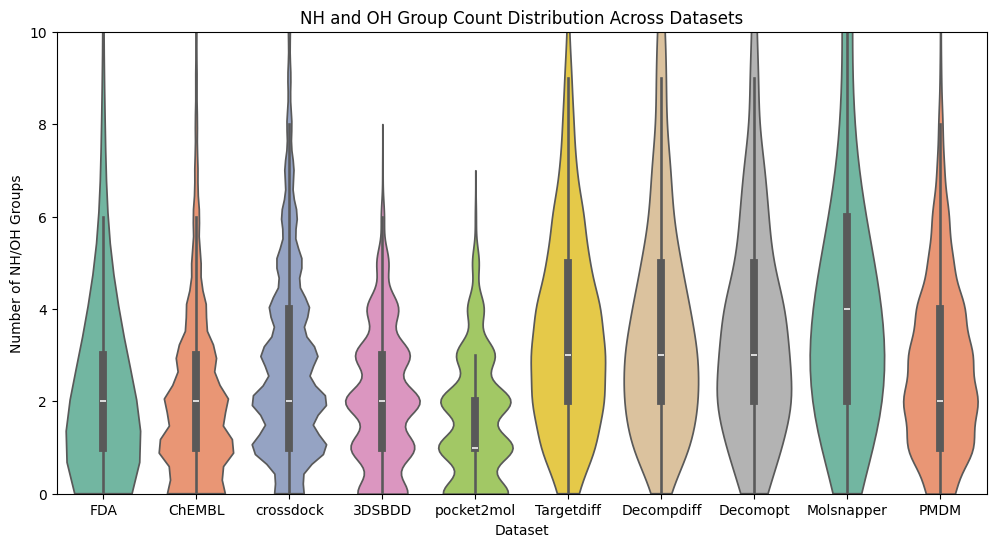

In [74]:
def calculate_nhoh_counts(smiles_list):
    """Calculate the number of NH and OH groups for each molecule in the SMILES list."""
    nhoh_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of NH and OH groups
            nhoh_count = Lipinski.NHOHCount(mol)
            nhoh_counts.append(nhoh_count)
    return nhoh_counts

def plot_nhoh_violinplot(dfs, labels):
    """Plot the distribution of NH and OH counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        nhoh_counts = calculate_nhoh_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in nhoh_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "NH/OH Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="NH/OH Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("NH and OH Group Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of NH/OH Groups")
    plt.ylim(0, 10)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_nhoh_violinplot(dfs, labels)

[17:02:27] WARNING: not removing hydrogen atom without neighbors
[17:02:27] WARNING: not removing hydrogen atom without neighbors
[17:02:27] WARNING: not removing hydrogen atom without neighbors
[17:02:27] WARNING: not removing hydrogen atom without neighbors
[17:02:27] WARNING: not removing hydrogen atom without neighbors


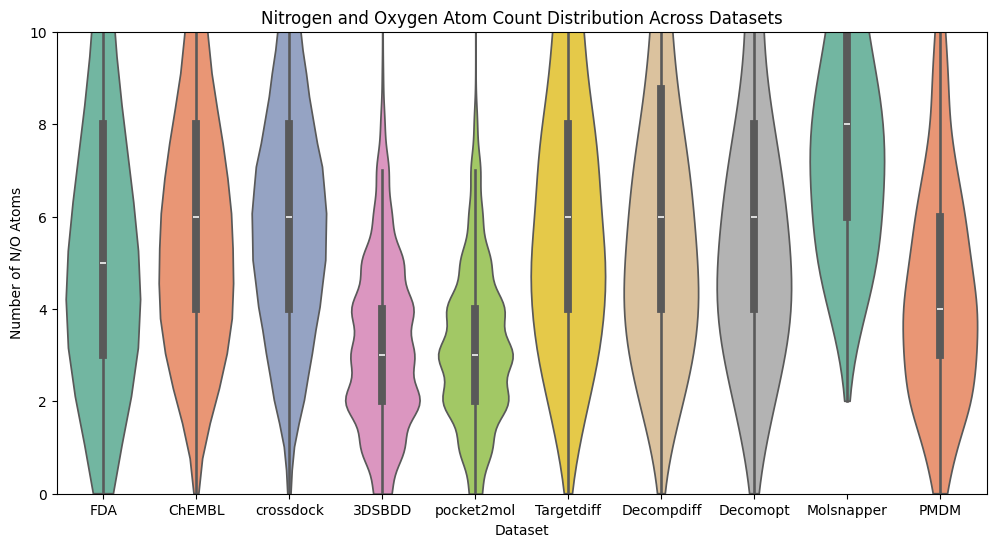

In [75]:
def calculate_no_counts(smiles_list):
    """Calculate the number of nitrogen (N) and oxygen (O) atoms for each molecule in the SMILES list."""
    no_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of N and O atoms
            no_count = Lipinski.NOCount(mol)
            no_counts.append(no_count)
    return no_counts

def plot_no_distribution(dfs, labels):
    """Plot the distribution of N and O counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        no_counts = calculate_no_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in no_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "N/O Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="N/O Count", data=plot_df, palette="Set2", cut=0)

    # Customizing the plot
    plt.title("Nitrogen and Oxygen Atom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of N/O Atoms")
    plt.ylim(0, 10)  # Adjust y-axis limit as needed

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_no_distribution(dfs, labels)

[17:08:16] WARNING: not removing hydrogen atom without neighbors
[17:08:16] WARNING: not removing hydrogen atom without neighbors
[17:08:16] WARNING: not removing hydrogen atom without neighbors
[17:08:16] WARNING: not removing hydrogen atom without neighbors
[17:08:17] WARNING: not removing hydrogen atom without neighbors


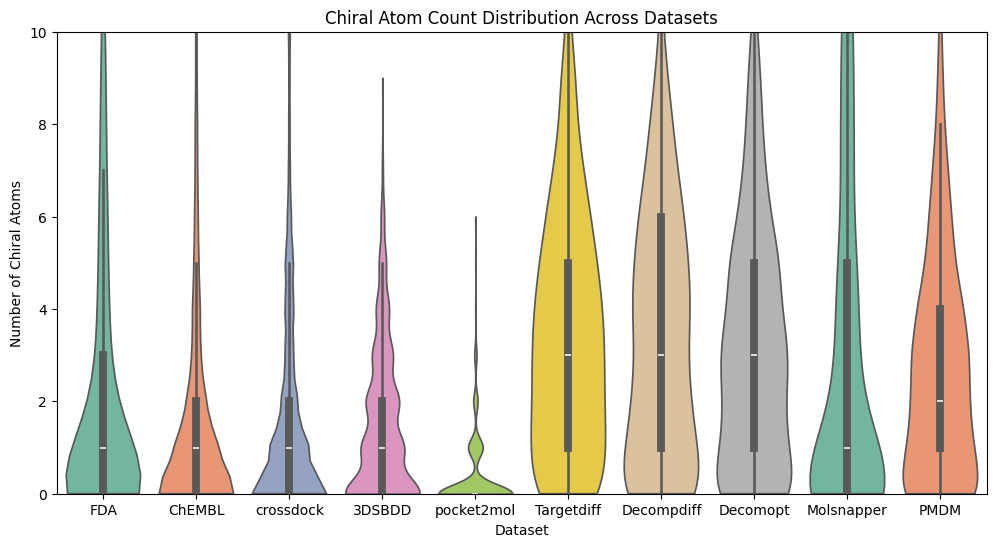

In [77]:
def calculate_chiral_atom_counts(smiles_list):
    """Calculate the number of chiral atoms for each molecule in the SMILES list."""
    chiral_atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of chiral centers
            chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
            chiral_atom_counts.append(len(chiral_centers))
    return chiral_atom_counts

def plot_chiral_atom_distribution(dfs, labels):
    """Plot the distribution of chiral atom counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        chiral_atom_counts = calculate_chiral_atom_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in chiral_atom_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Chiral Atom Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Chiral Atom Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Chiral Atom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Chiral Atoms")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_chiral_atom_distribution(dfs, labels)

[17:10:14] WARNING: not removing hydrogen atom without neighbors
[17:10:14] WARNING: not removing hydrogen atom without neighbors
[17:10:14] WARNING: not removing hydrogen atom without neighbors
[17:10:14] WARNING: not removing hydrogen atom without neighbors
[17:10:14] WARNING: not removing hydrogen atom without neighbors


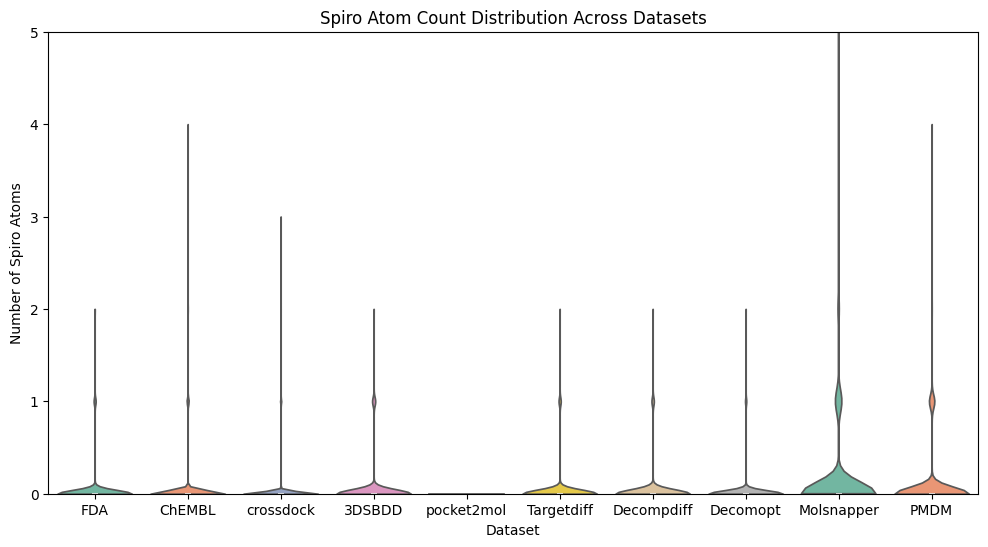

In [81]:
def calculate_spiro_atom_counts(smiles_list):
    """Calculate the number of spiro atoms for each molecule in the SMILES list."""
    spiro_atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of spiro atoms
            spiro_count = rdMolDescriptors.CalcNumSpiroAtoms(mol)
            spiro_atom_counts.append(spiro_count)
    return spiro_atom_counts

def plot_spiro_atom_distribution(dfs, labels):
    """Plot the distribution of spiro atom counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        spiro_atom_counts = calculate_spiro_atom_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in spiro_atom_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Spiro Atom Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Spiro Atom Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Spiro Atom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Spiro Atoms")
    plt.ylim(0, 5)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_spiro_atom_distribution(dfs, labels)

[17:10:48] WARNING: not removing hydrogen atom without neighbors
[17:10:49] WARNING: not removing hydrogen atom without neighbors
[17:10:49] WARNING: not removing hydrogen atom without neighbors
[17:10:49] WARNING: not removing hydrogen atom without neighbors
[17:10:49] WARNING: not removing hydrogen atom without neighbors


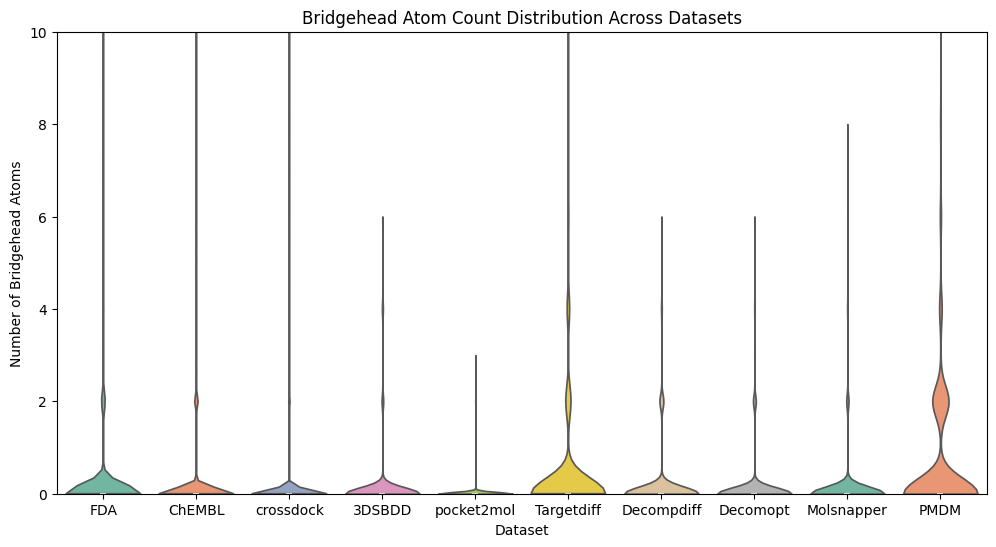

In [82]:
def calculate_bridgehead_atom_counts(smiles_list):
    """Calculate the number of bridgehead atoms for each molecule in the SMILES list."""
    bridgehead_atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate the number of bridgehead atoms
            bridgehead_count = rdMolDescriptors.CalcNumBridgeheadAtoms(mol)
            bridgehead_atom_counts.append(bridgehead_count)
    return bridgehead_atom_counts

def plot_bridgehead_atom_distribution(dfs, labels):
    """Plot the distribution of bridgehead atom counts for multiple DataFrames as a violin plot."""
    # Prepare data for violin plot
    data = []
    for df, label in zip(dfs, labels):
        bridgehead_atom_counts = calculate_bridgehead_atom_counts(df['SMILES'].tolist())
        data.extend([(label, count) for count in bridgehead_atom_counts])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data, columns=["Dataset", "Bridgehead Atom Count"])
    
    # Plotting the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Dataset", y="Bridgehead Atom Count", data=plot_df, palette="Set2", cut=0)
    
    # Customizing the plot
    plt.title("Bridgehead Atom Count Distribution Across Datasets")
    plt.xlabel("Dataset")
    plt.ylabel("Number of Bridgehead Atoms")
    plt.ylim(0, 10)  # Adjust y-axis limit as per your data's range

    plt.show()

# Example usage with a list of DataFrames and their labels
dfs = [df_fda, df_ChEMBL, df_crossdock, df_3DSBDD, df_p2m, df_targetdiff, df_decompdiff, df_decompopt, df_molsnapper, df_pmdm]  # Replace with your actual DataFrames
labels = ["FDA", "ChEMBL", "crossdock", "3DSBDD", "pocket2mol", "Targetdiff", "Decompdiff", "Decomopt", "Molsnapper", "PMDM"]  # Replace with your actual labels

plot_bridgehead_atom_distribution(dfs, labels)